In [8]:
import h5py
import numpy as np
import pickle
import os

import dynesty
from dynesty import utils as dyfunc
from getdist import plots, MCSamples

import matplotlib
from matplotlib import pylab
%config InlineBackend.figure_format = 'retina'
matplotlib.rcParams['figure.dpi'] = 80
textsize = 'x-large'
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (6, 4),
         'axes.labelsize': textsize,
         'axes.titlesize': textsize,
         'xtick.labelsize': textsize,
         'ytick.labelsize': textsize,
         'figure.facecolor': 'w'}
pylab.rcParams.update(params)
from matplotlib import pyplot as plt

%load_ext autoreload
%autoreload 2
import plotter
import utils
import generate_cosmo_hod_id_pairs as idgen
import emulator
from chain_variables import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Original recovery tests

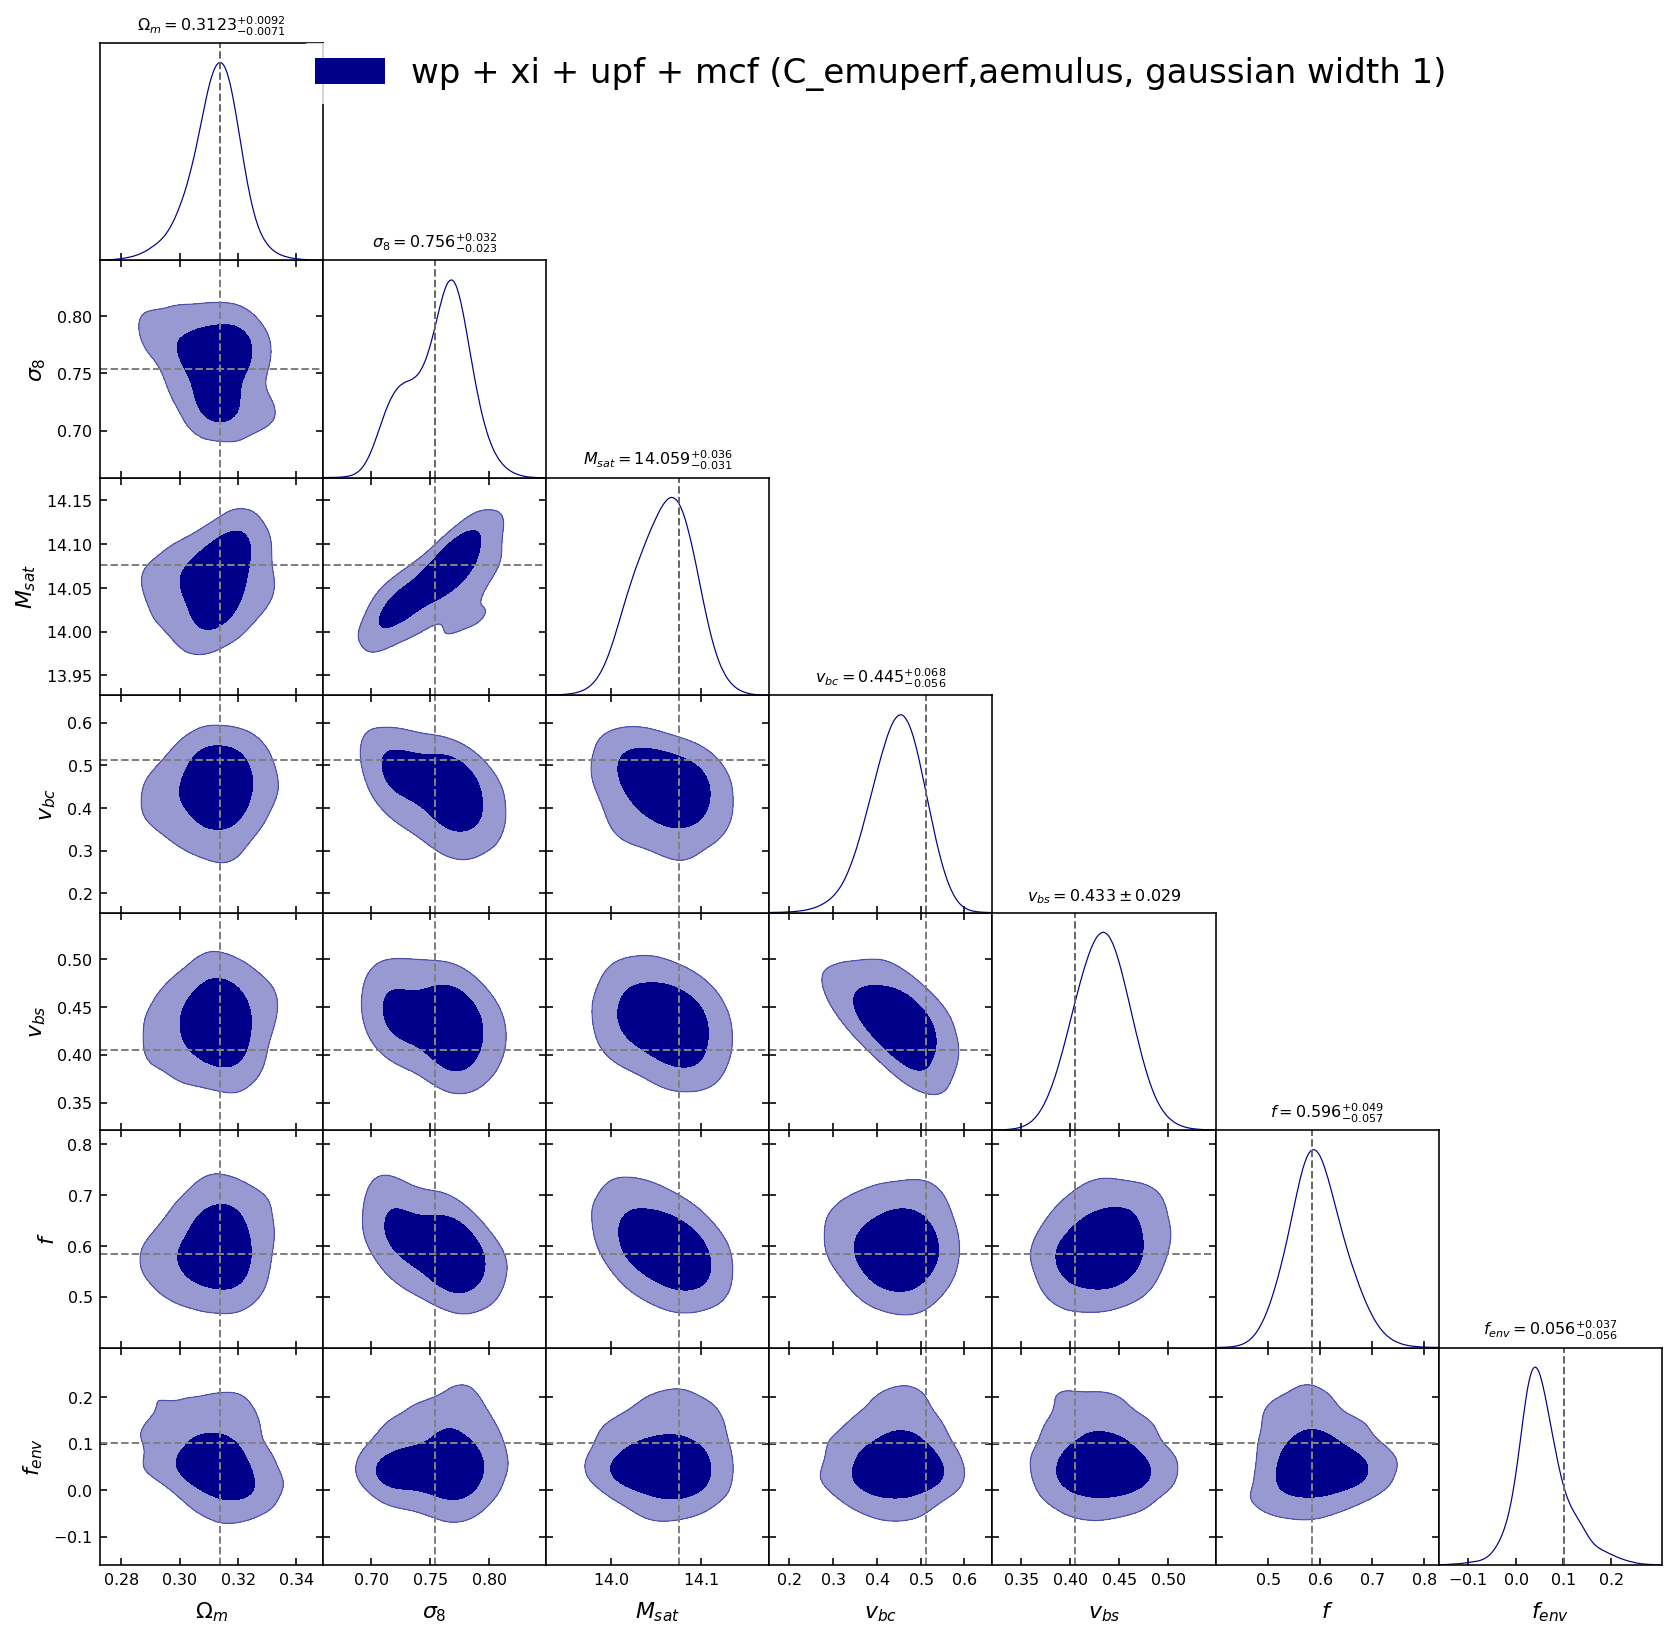

In [6]:
chaintags = [
             'wp_xi_upf_mcf_c1h1_all_dy_covsmoothgauss1',
            ]
legend_labels = [
                 'wp + xi + upf + mcf (C_emuperf,aemulus, gaussian width 1)',
                ]
colors = ['darkblue',
         ]
g = plotter.plot_contours_dynesty(chaintags, legend_labels=legend_labels,
                      colors=colors, params_toplot=key_params)

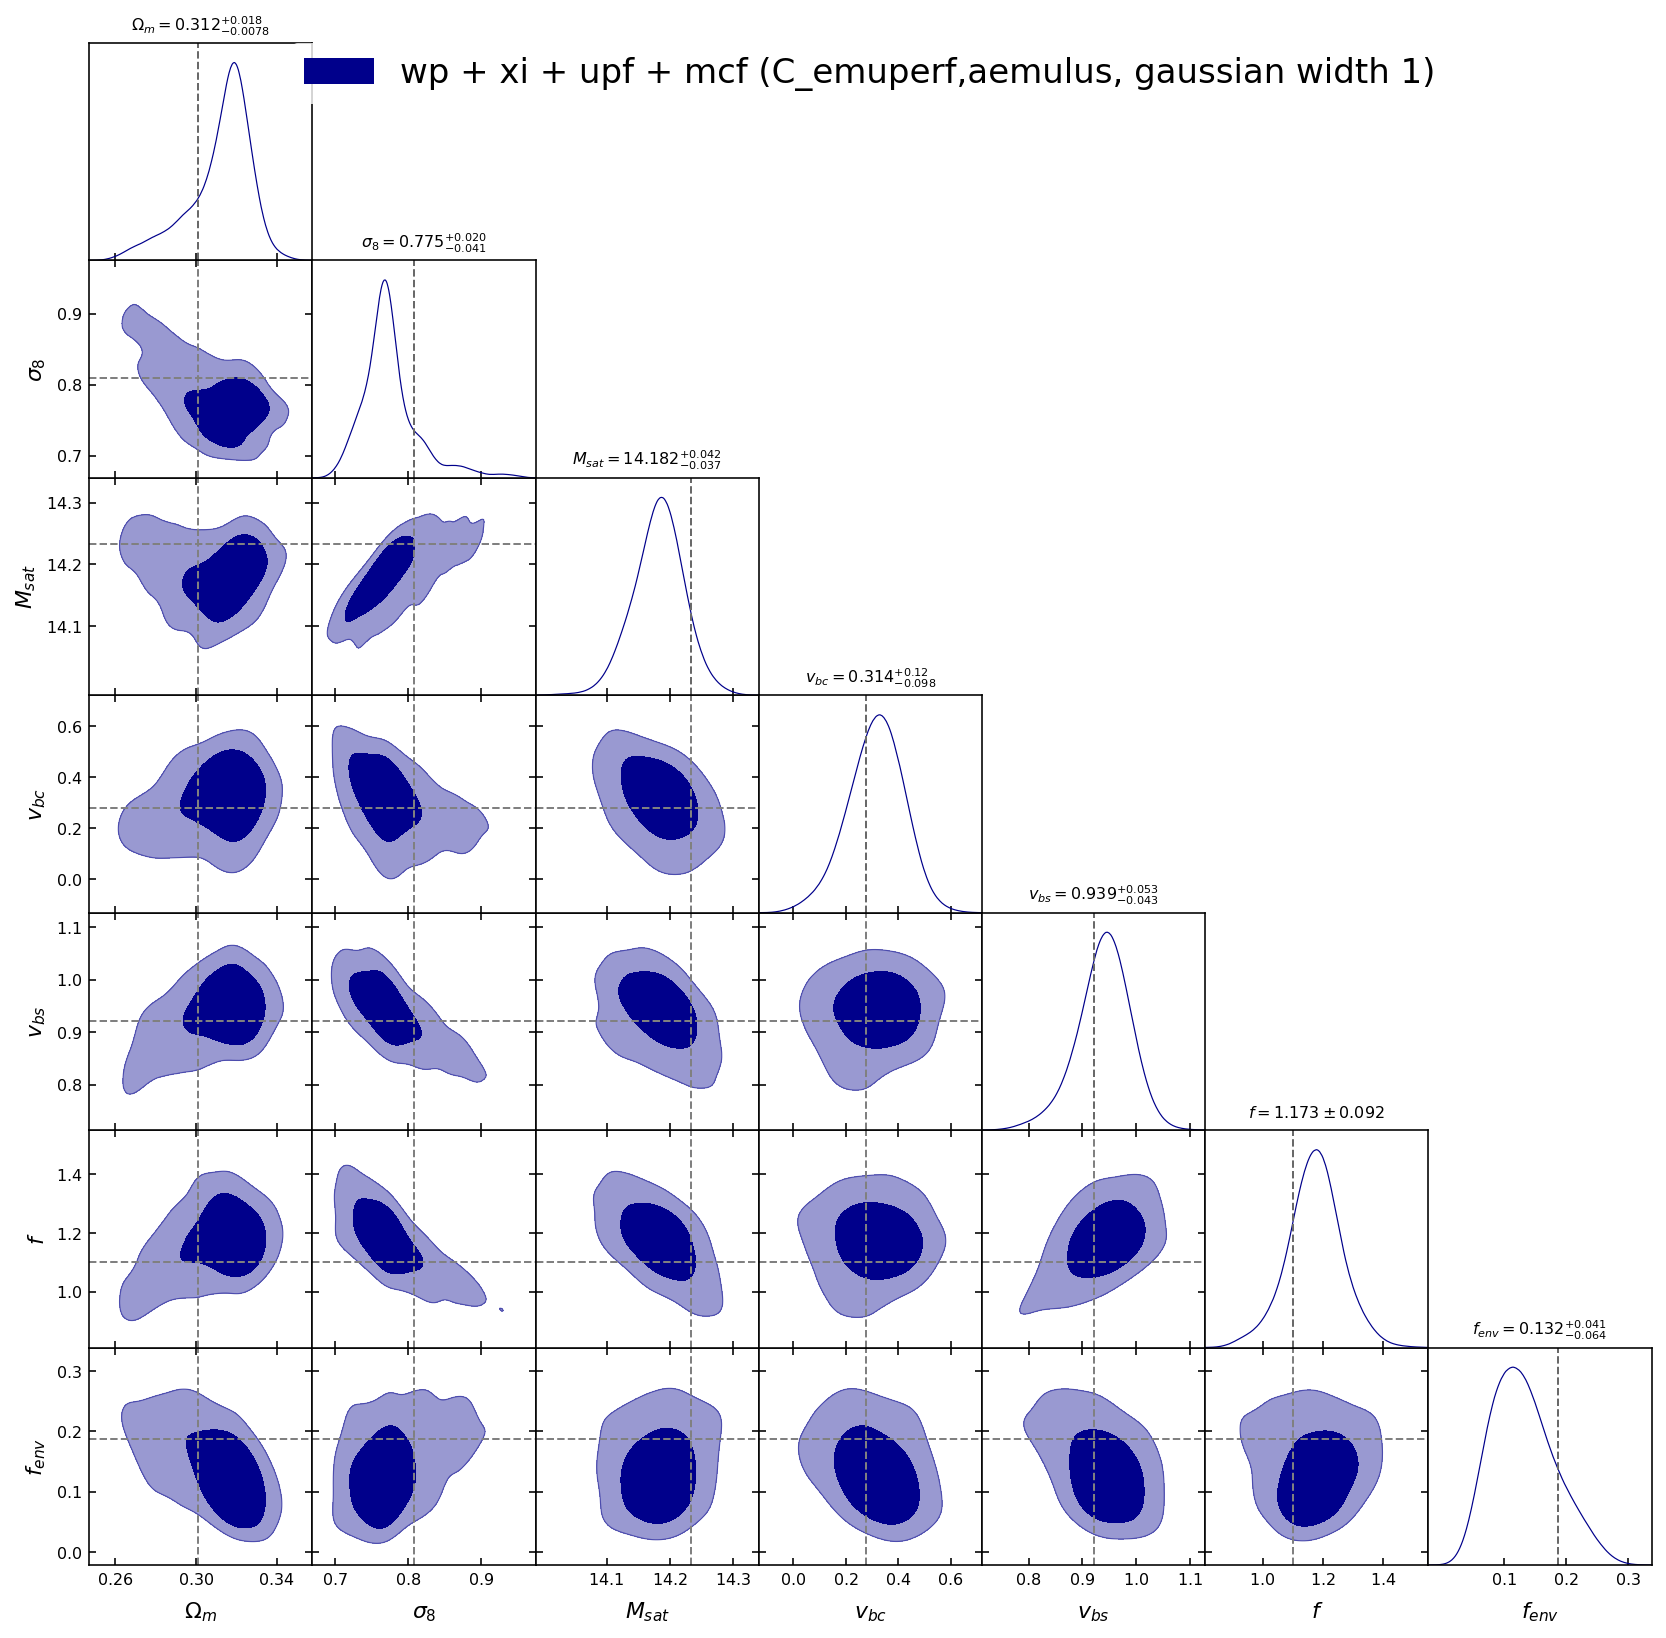

In [7]:
chaintags = [
             'wp_xi_upf_mcf_c2h0_all_dy_covsmoothgauss1',
            ]
legend_labels = [
                 'wp + xi + upf + mcf (C_emuperf,aemulus, gaussian width 1)',
                ]
colors = ['darkblue',
         ]
g = plotter.plot_contours_dynesty(chaintags, legend_labels=legend_labels,
                      colors=colors, params_toplot=key_params)

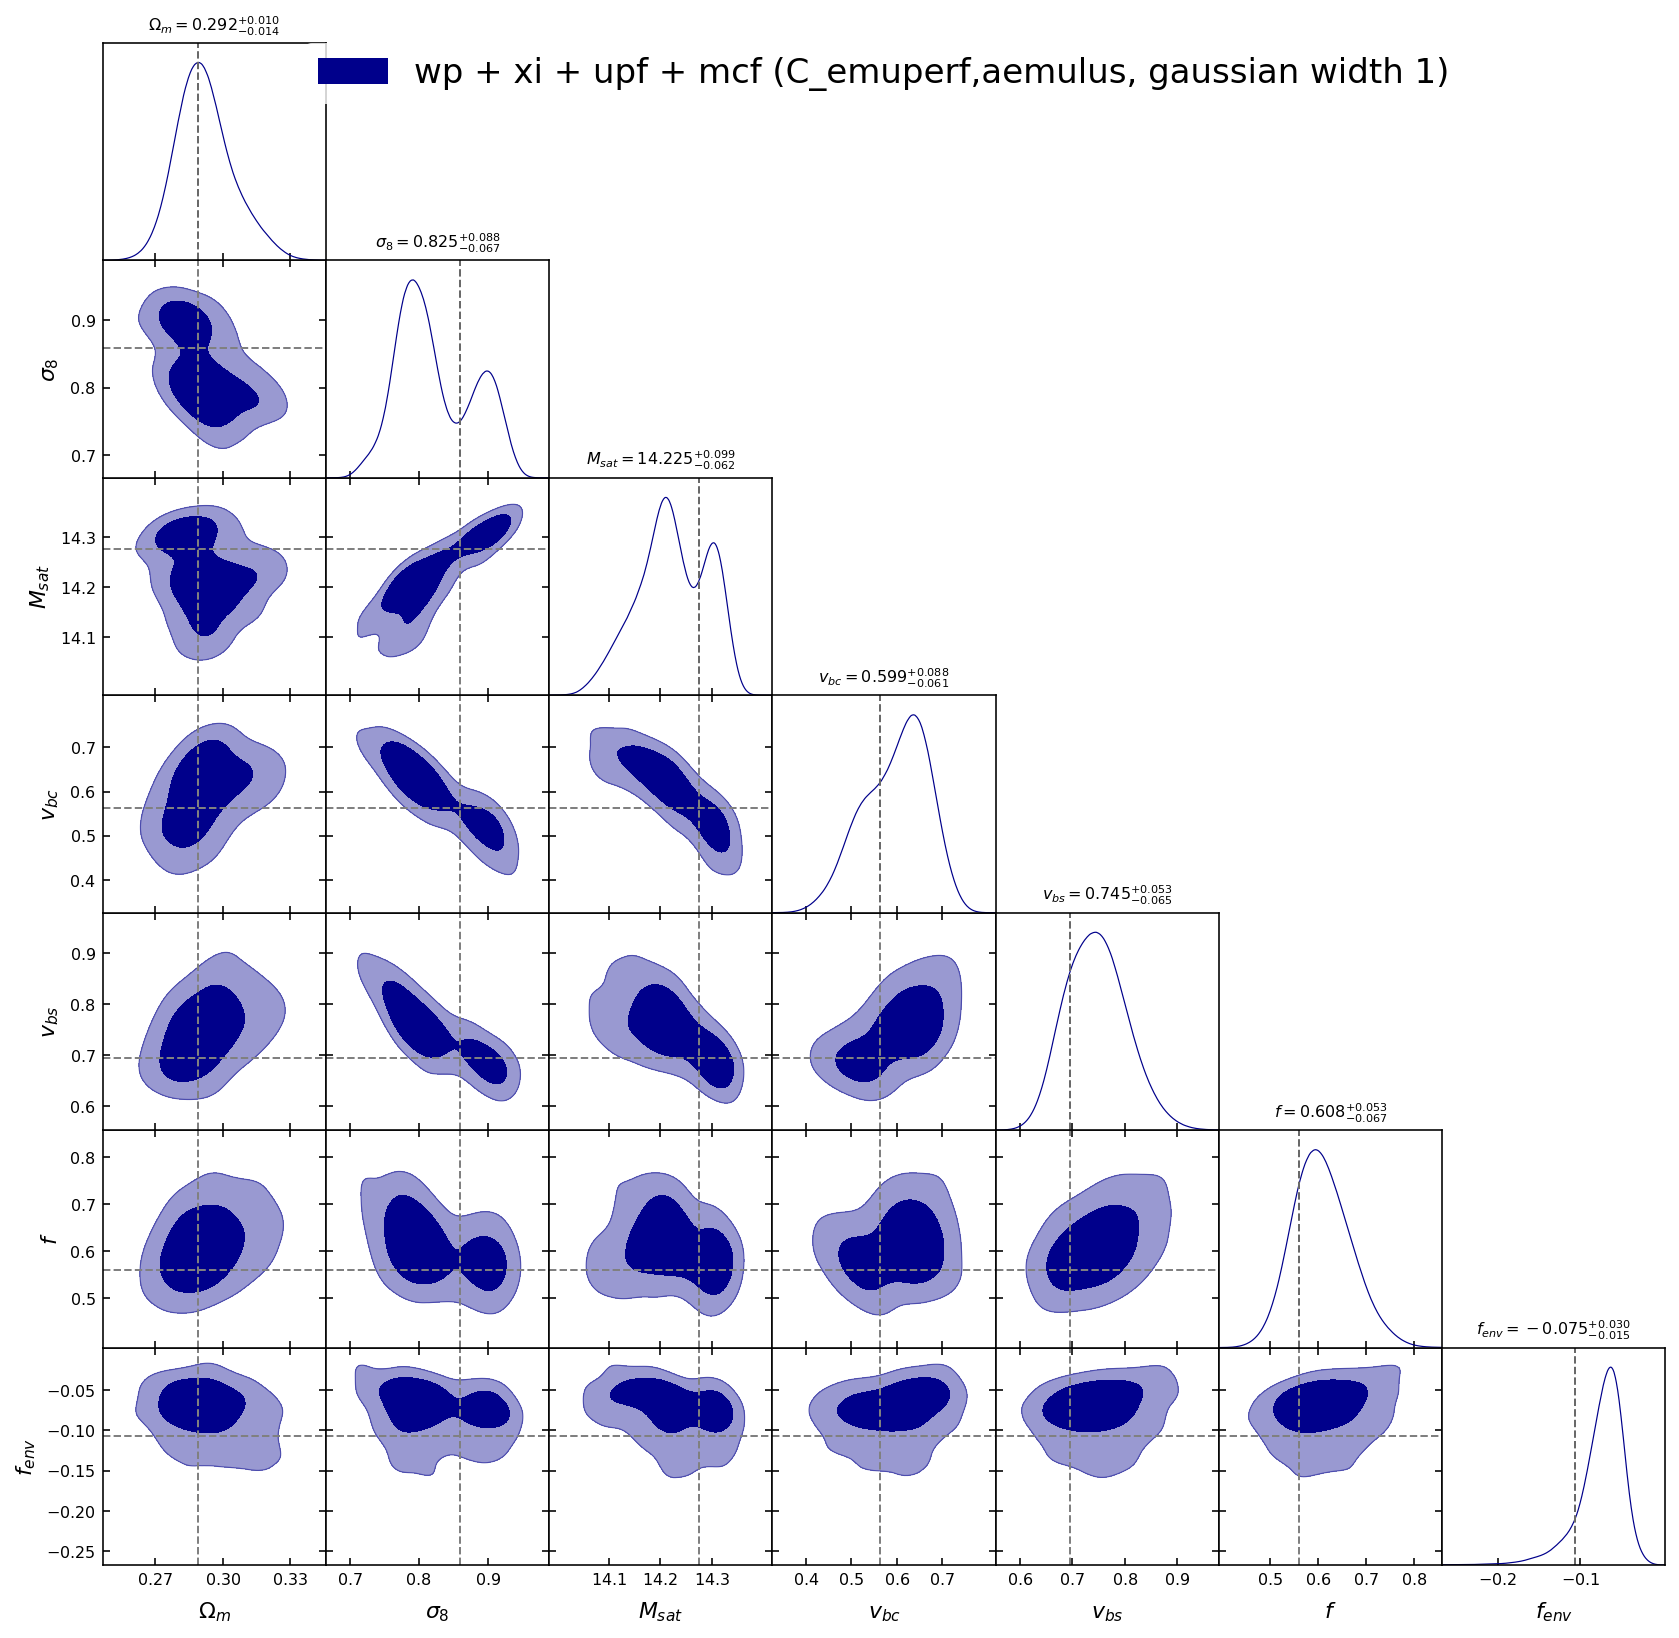

In [8]:
chaintags = [
             'wp_xi_upf_mcf_c3h3_all_dy_covsmoothgauss1',
            ]
legend_labels = [
                 'wp + xi + upf + mcf (C_emuperf,aemulus, gaussian width 1)',
                ]
colors = ['darkblue',
         ]
g = plotter.plot_contours_dynesty(chaintags, legend_labels=legend_labels,
                      colors=colors, params_toplot=key_params)

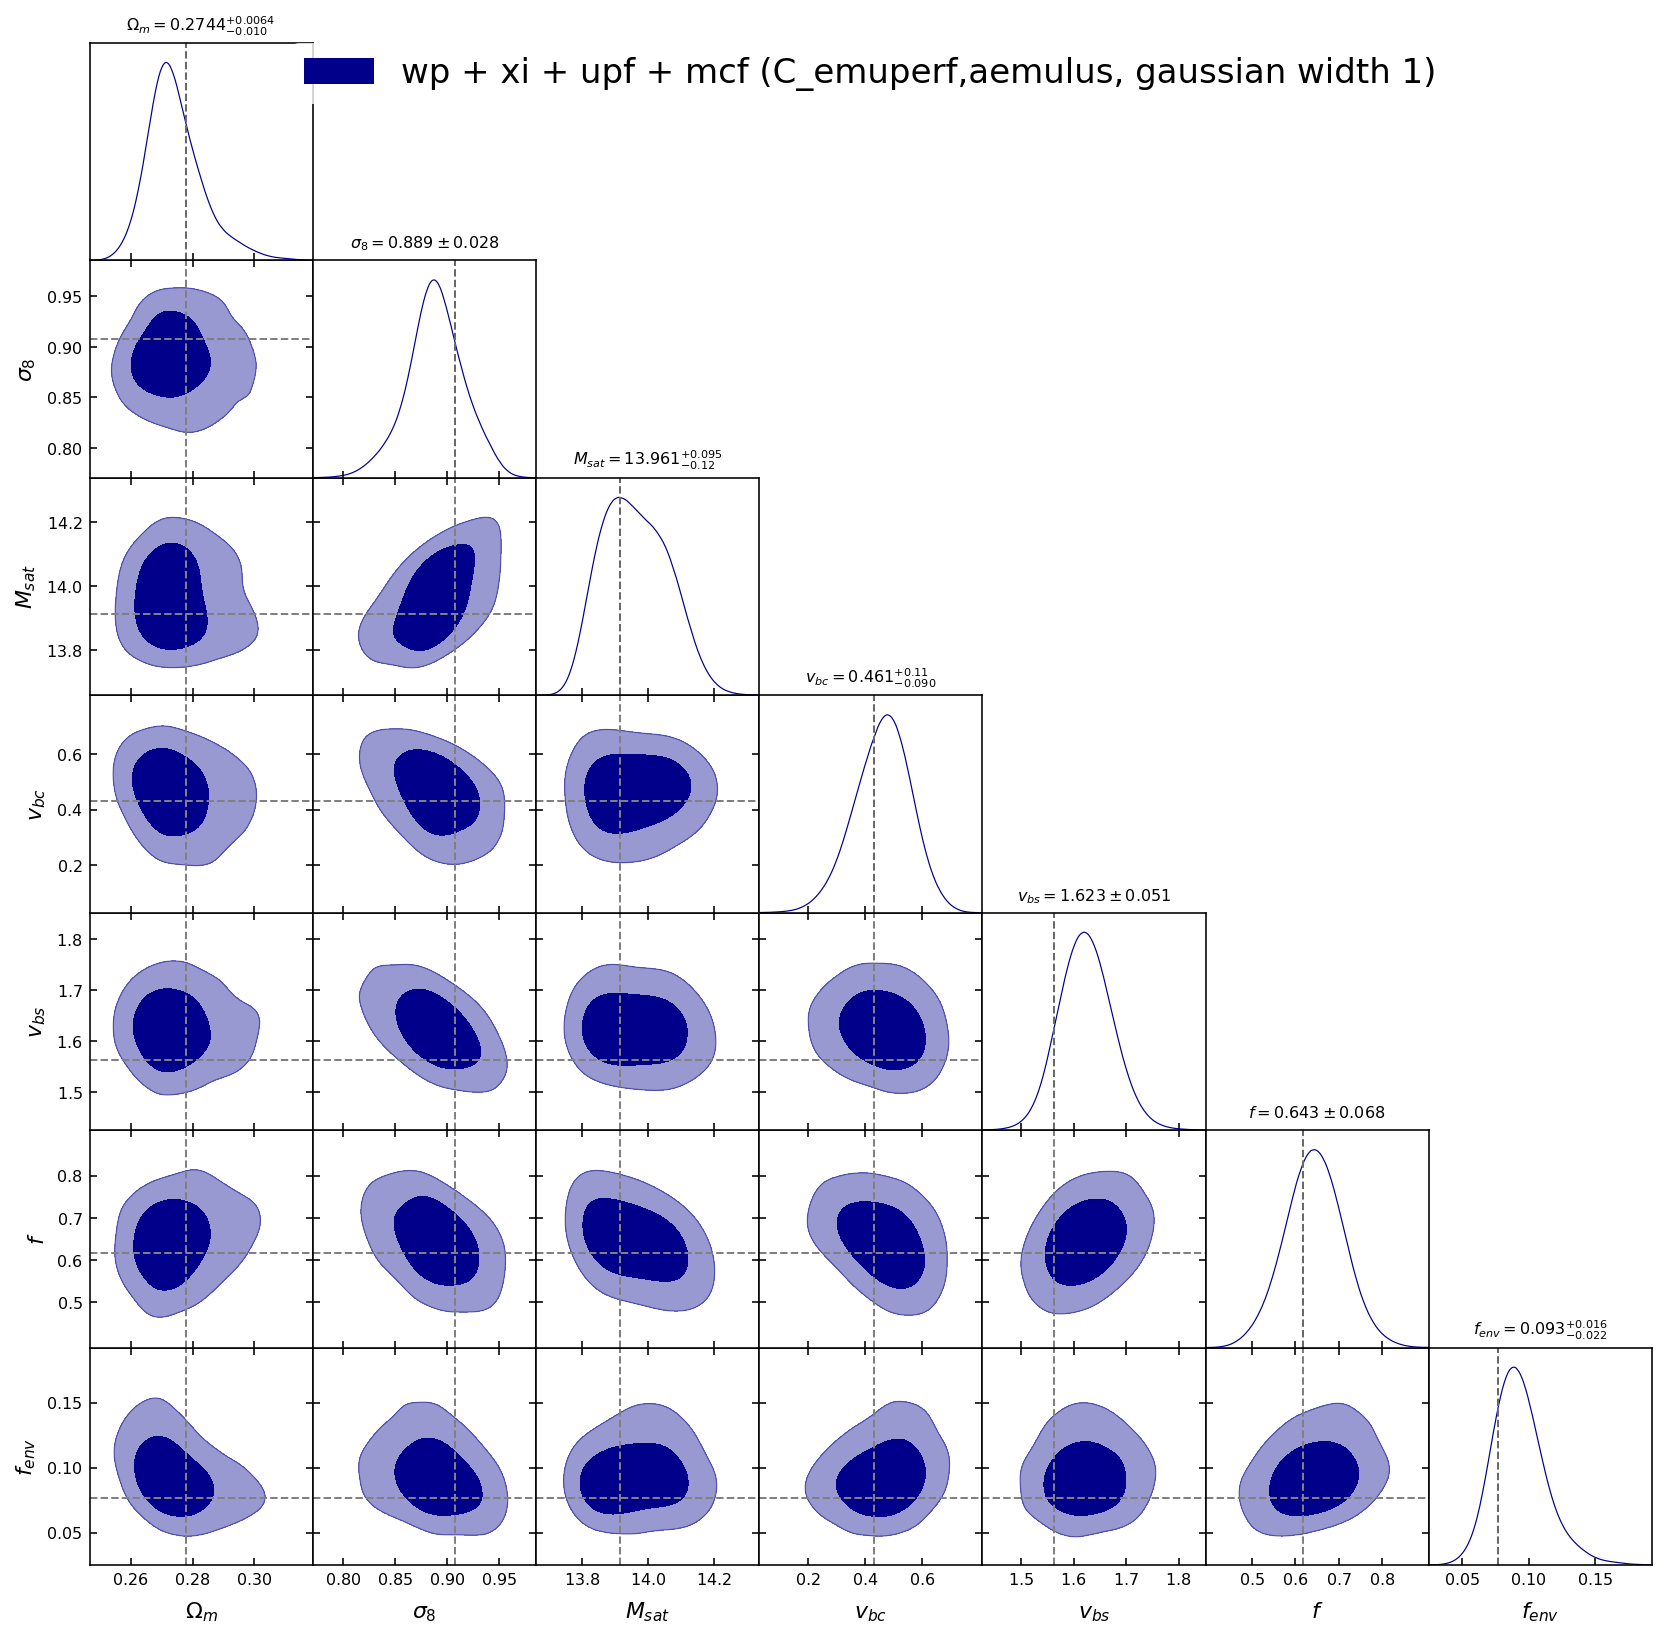

In [9]:
chaintags = [
             'wp_xi_upf_mcf_c4h4_all_dy_covsmoothgauss1',
            ]
legend_labels = [
                 'wp + xi + upf + mcf (C_emuperf,aemulus, gaussian width 1)',
                ]
colors = ['darkblue',
         ]
g = plotter.plot_contours_dynesty(chaintags, legend_labels=legend_labels,
                      colors=colors, params_toplot=key_params)

## Nice recovery set 

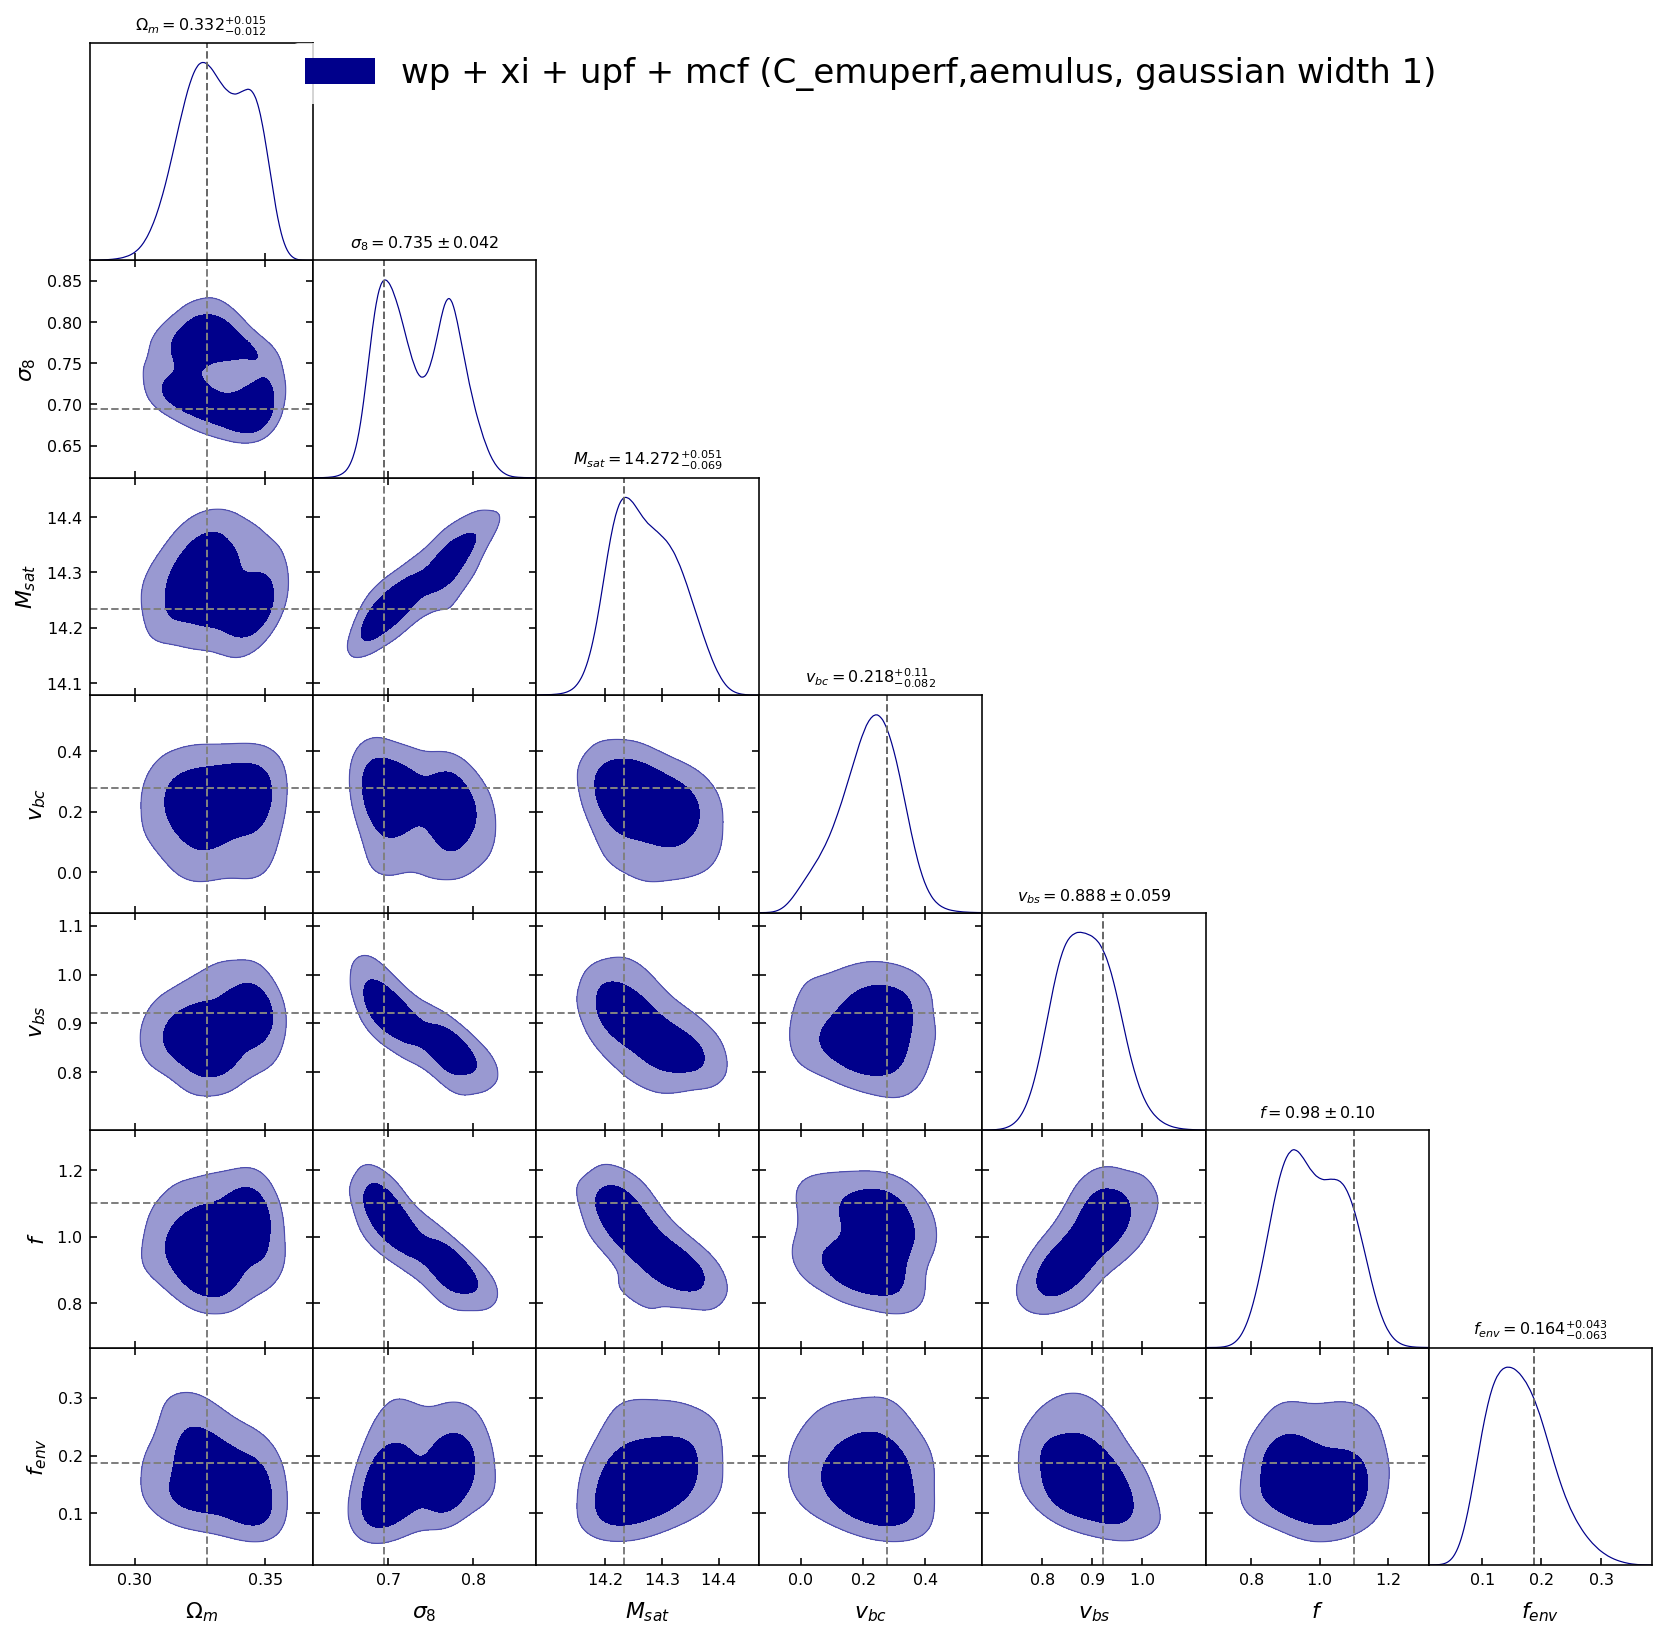

In [2]:
chaintags = [
             'wp_xi_upf_mcf_c0h0_all_dy_covsmoothgauss1',
            ]
legend_labels = [
                 'wp + xi + upf + mcf (C_emuperf,aemulus, gaussian width 1)',
                ]
colors = ['darkblue',
         ]
g = plotter.plot_contours_dynesty(chaintags, legend_labels=legend_labels,
                      colors=colors, params_toplot=key_params)

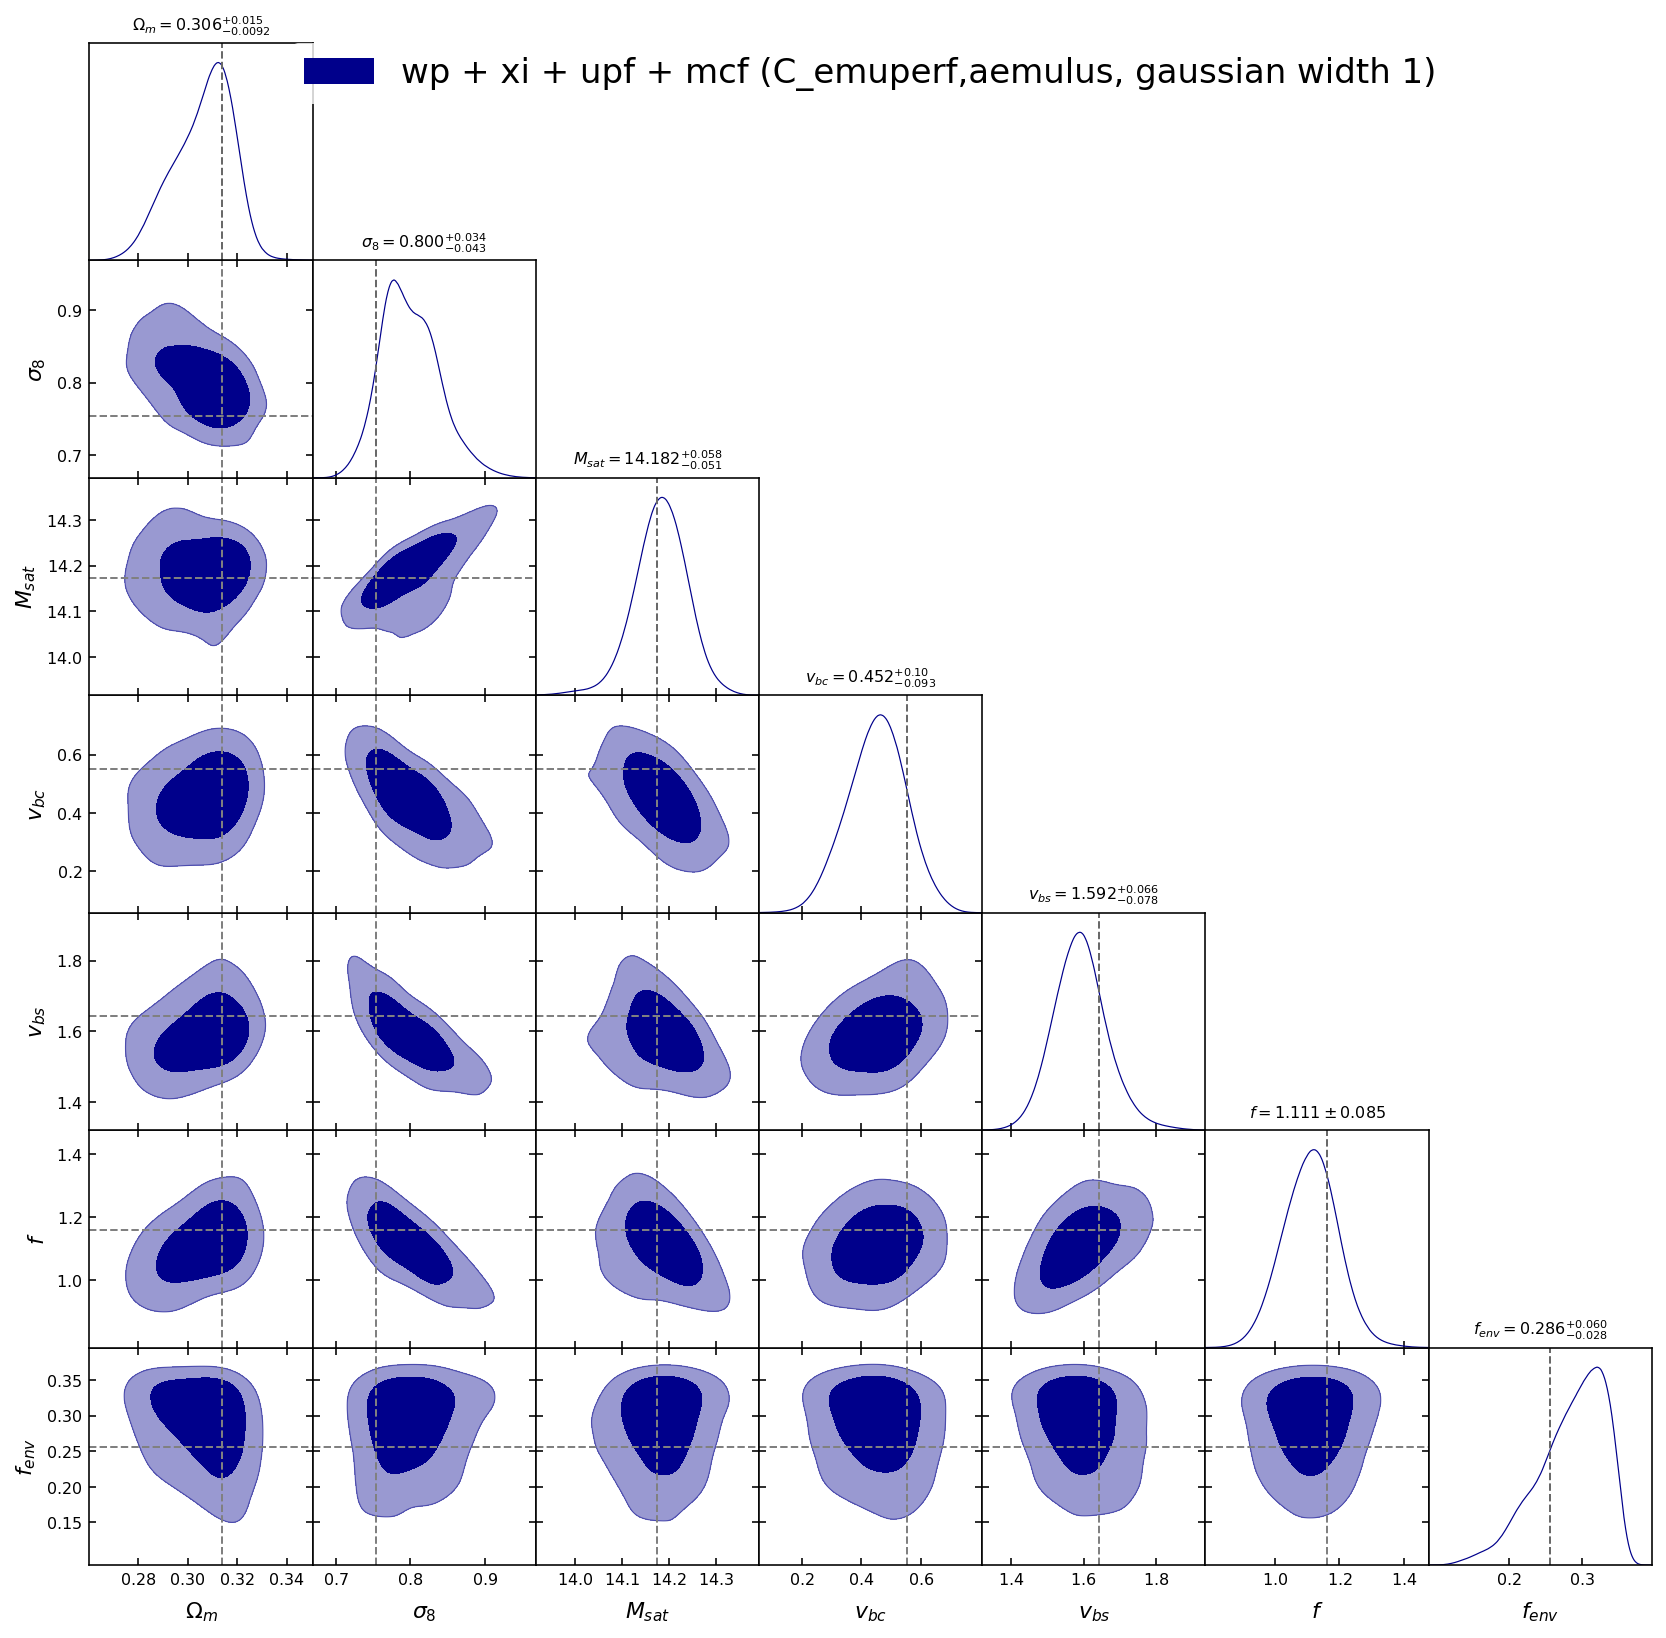

In [3]:
chaintags = [
             'wp_xi_upf_mcf_c1h10_all_dy_covsmoothgauss1',
            ]
legend_labels = [
                 'wp + xi + upf + mcf (C_emuperf,aemulus, gaussian width 1)',
                ]
colors = ['darkblue',
         ]
g = plotter.plot_contours_dynesty(chaintags, legend_labels=legend_labels,
                      colors=colors, params_toplot=key_params)

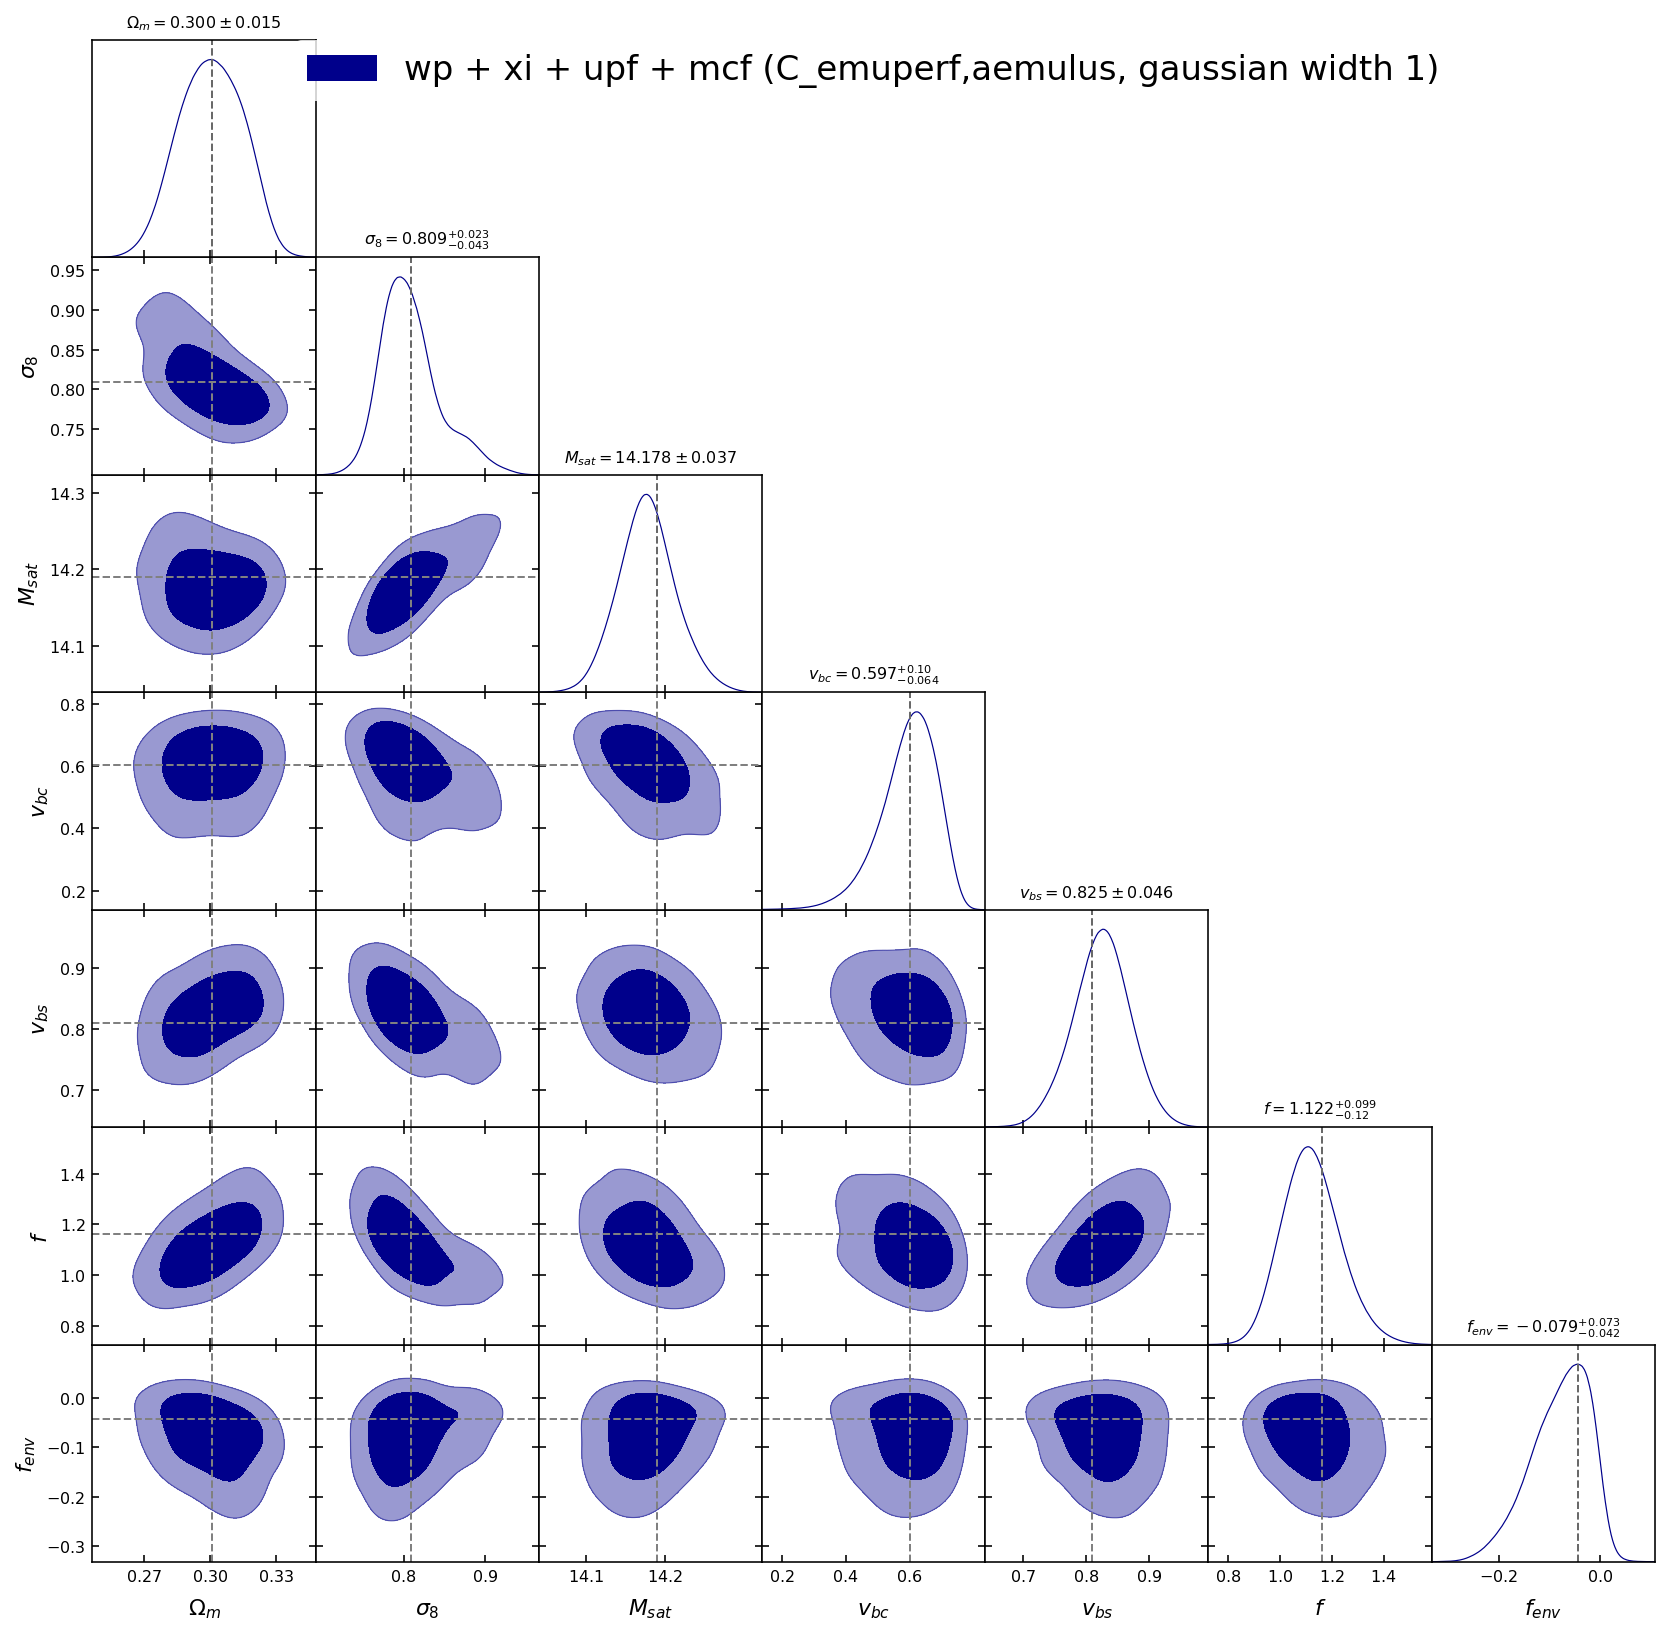

In [4]:
chaintags = [
             'wp_xi_upf_mcf_c2h20_all_dy_covsmoothgauss1',
            ]
legend_labels = [
                 'wp + xi + upf + mcf (C_emuperf,aemulus, gaussian width 1)',
                ]
colors = ['darkblue',
         ]
g = plotter.plot_contours_dynesty(chaintags, legend_labels=legend_labels,
                      colors=colors, params_toplot=key_params)

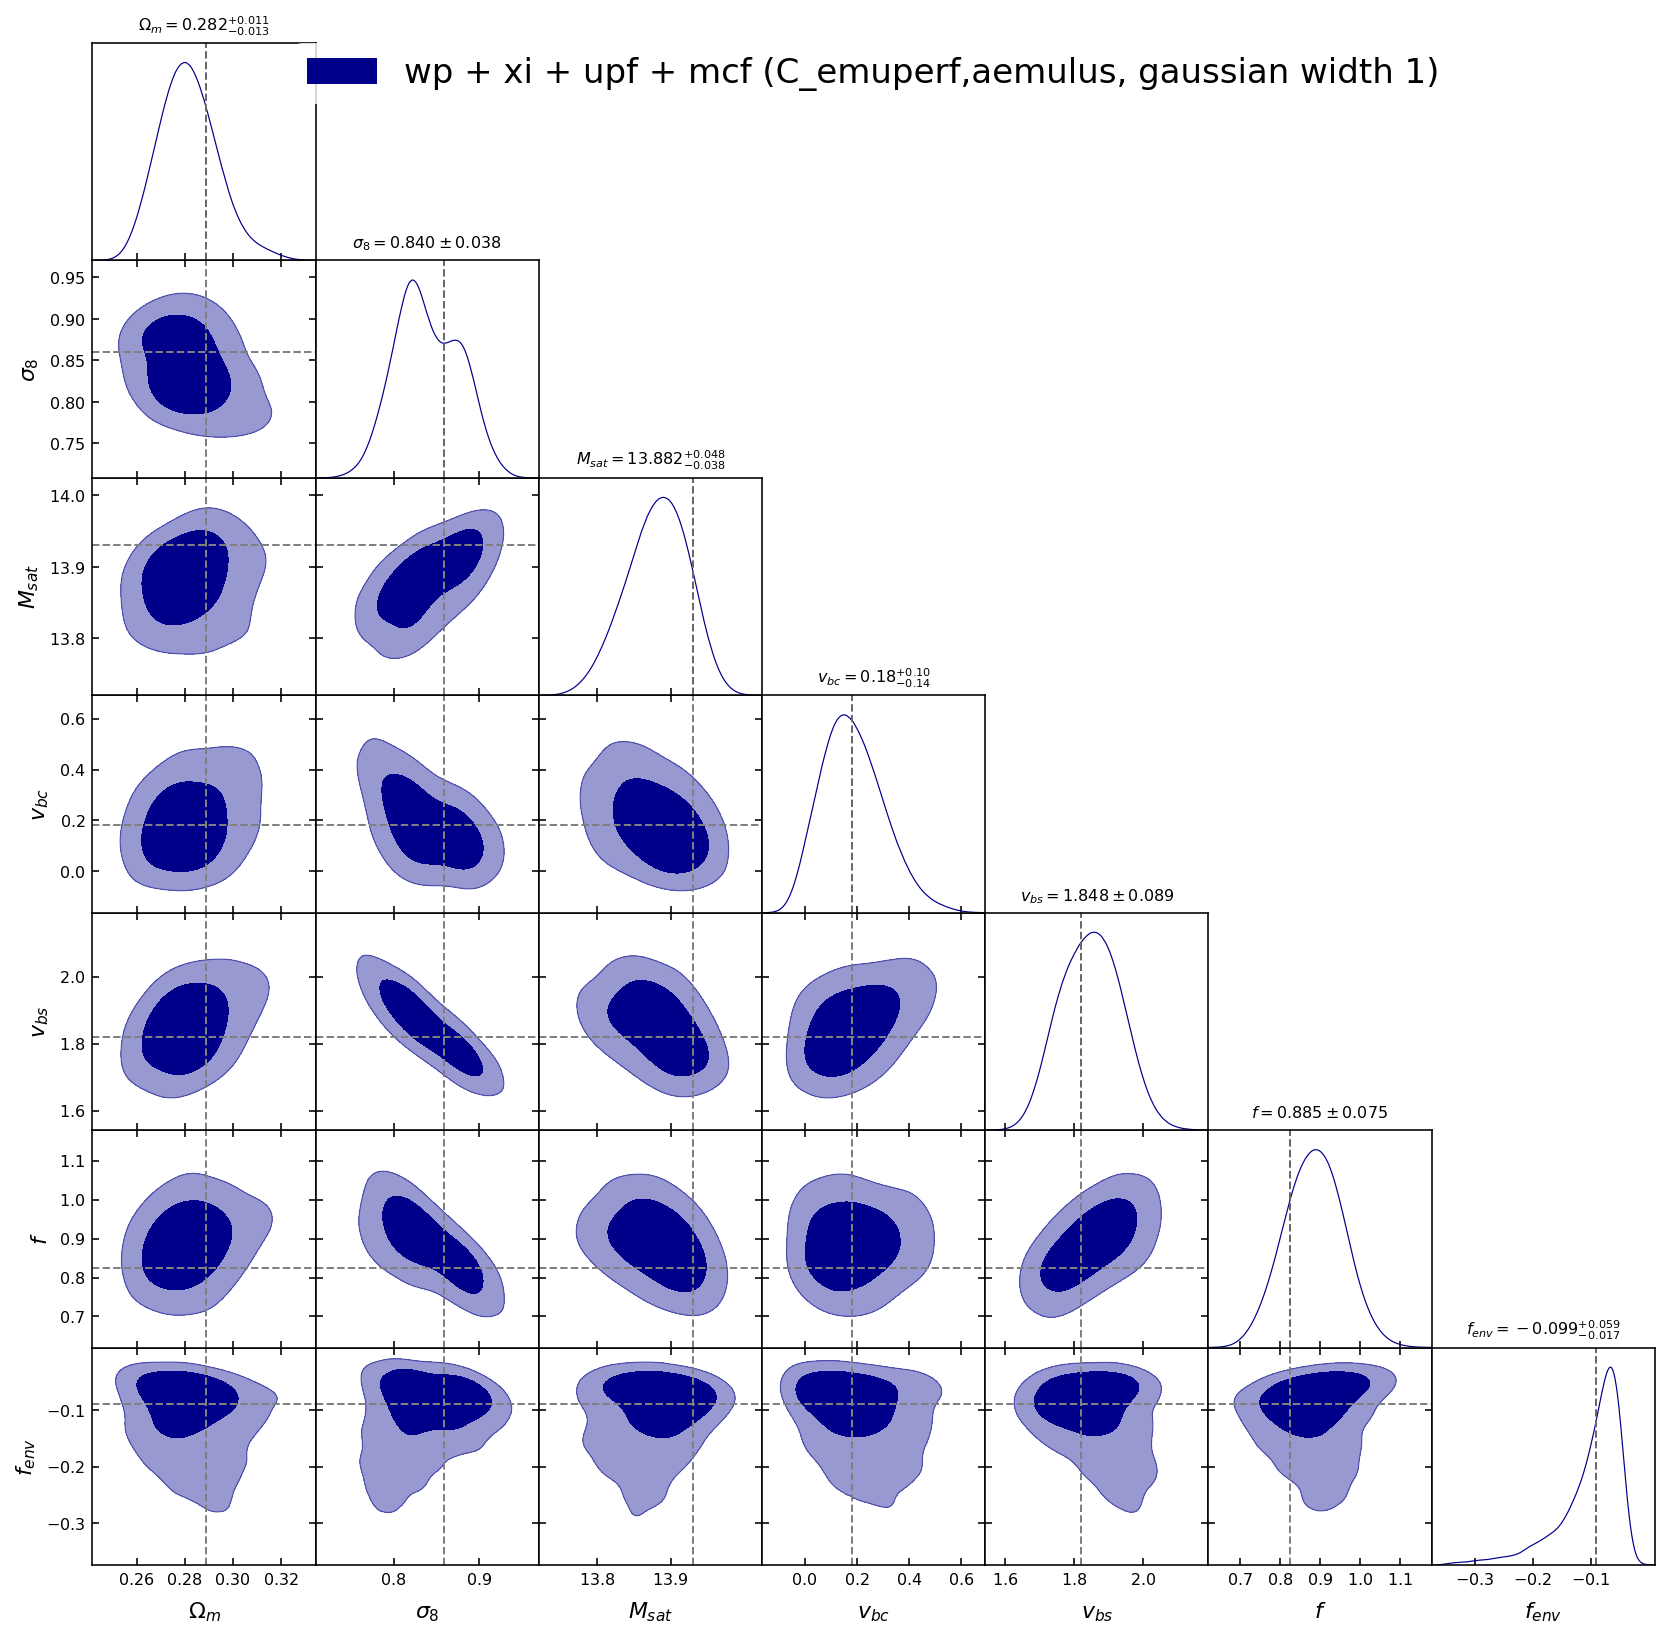

In [2]:
chaintags = [
             'wp_xi_upf_mcf_c3h30_all_dy_covsmoothgauss1',
            ]
legend_labels = [
                 'wp + xi + upf + mcf (C_emuperf,aemulus, gaussian width 1)',
                ]
colors = ['darkblue',
         ]
g = plotter.plot_contours_dynesty(chaintags, legend_labels=legend_labels,
                      colors=colors, params_toplot=key_params)

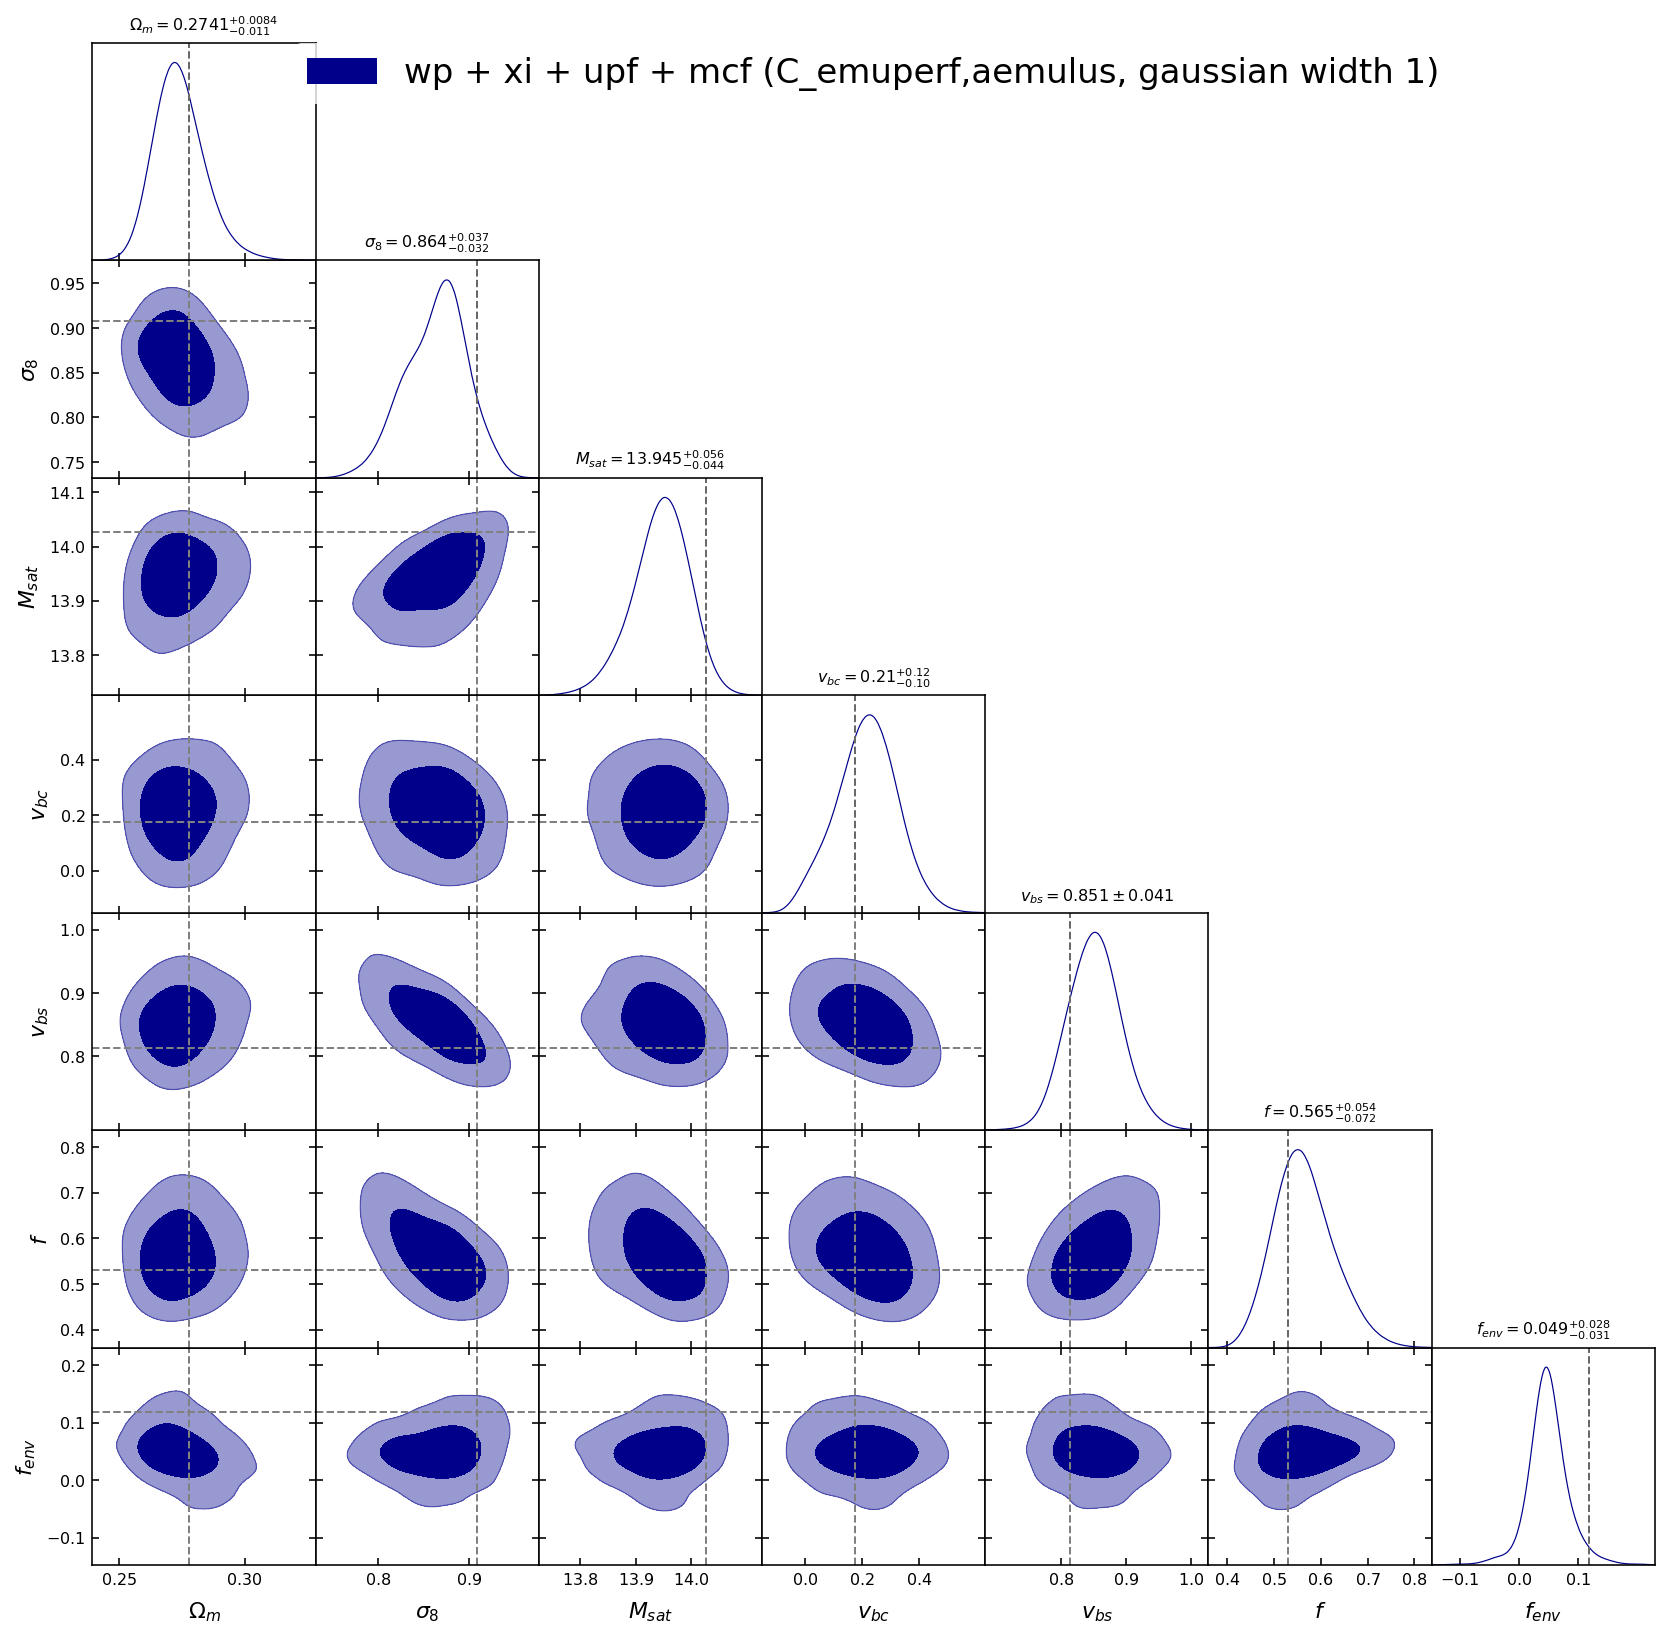

In [4]:
chaintags = [
             'wp_xi_upf_mcf_c4h40_all_dy_covsmoothgauss1',
            ]
legend_labels = [
                 'wp + xi + upf + mcf (C_emuperf,aemulus, gaussian width 1)',
                ]
colors = ['darkblue',
         ]
g = plotter.plot_contours_dynesty(chaintags, legend_labels=legend_labels,
                      colors=colors, params_toplot=key_params)

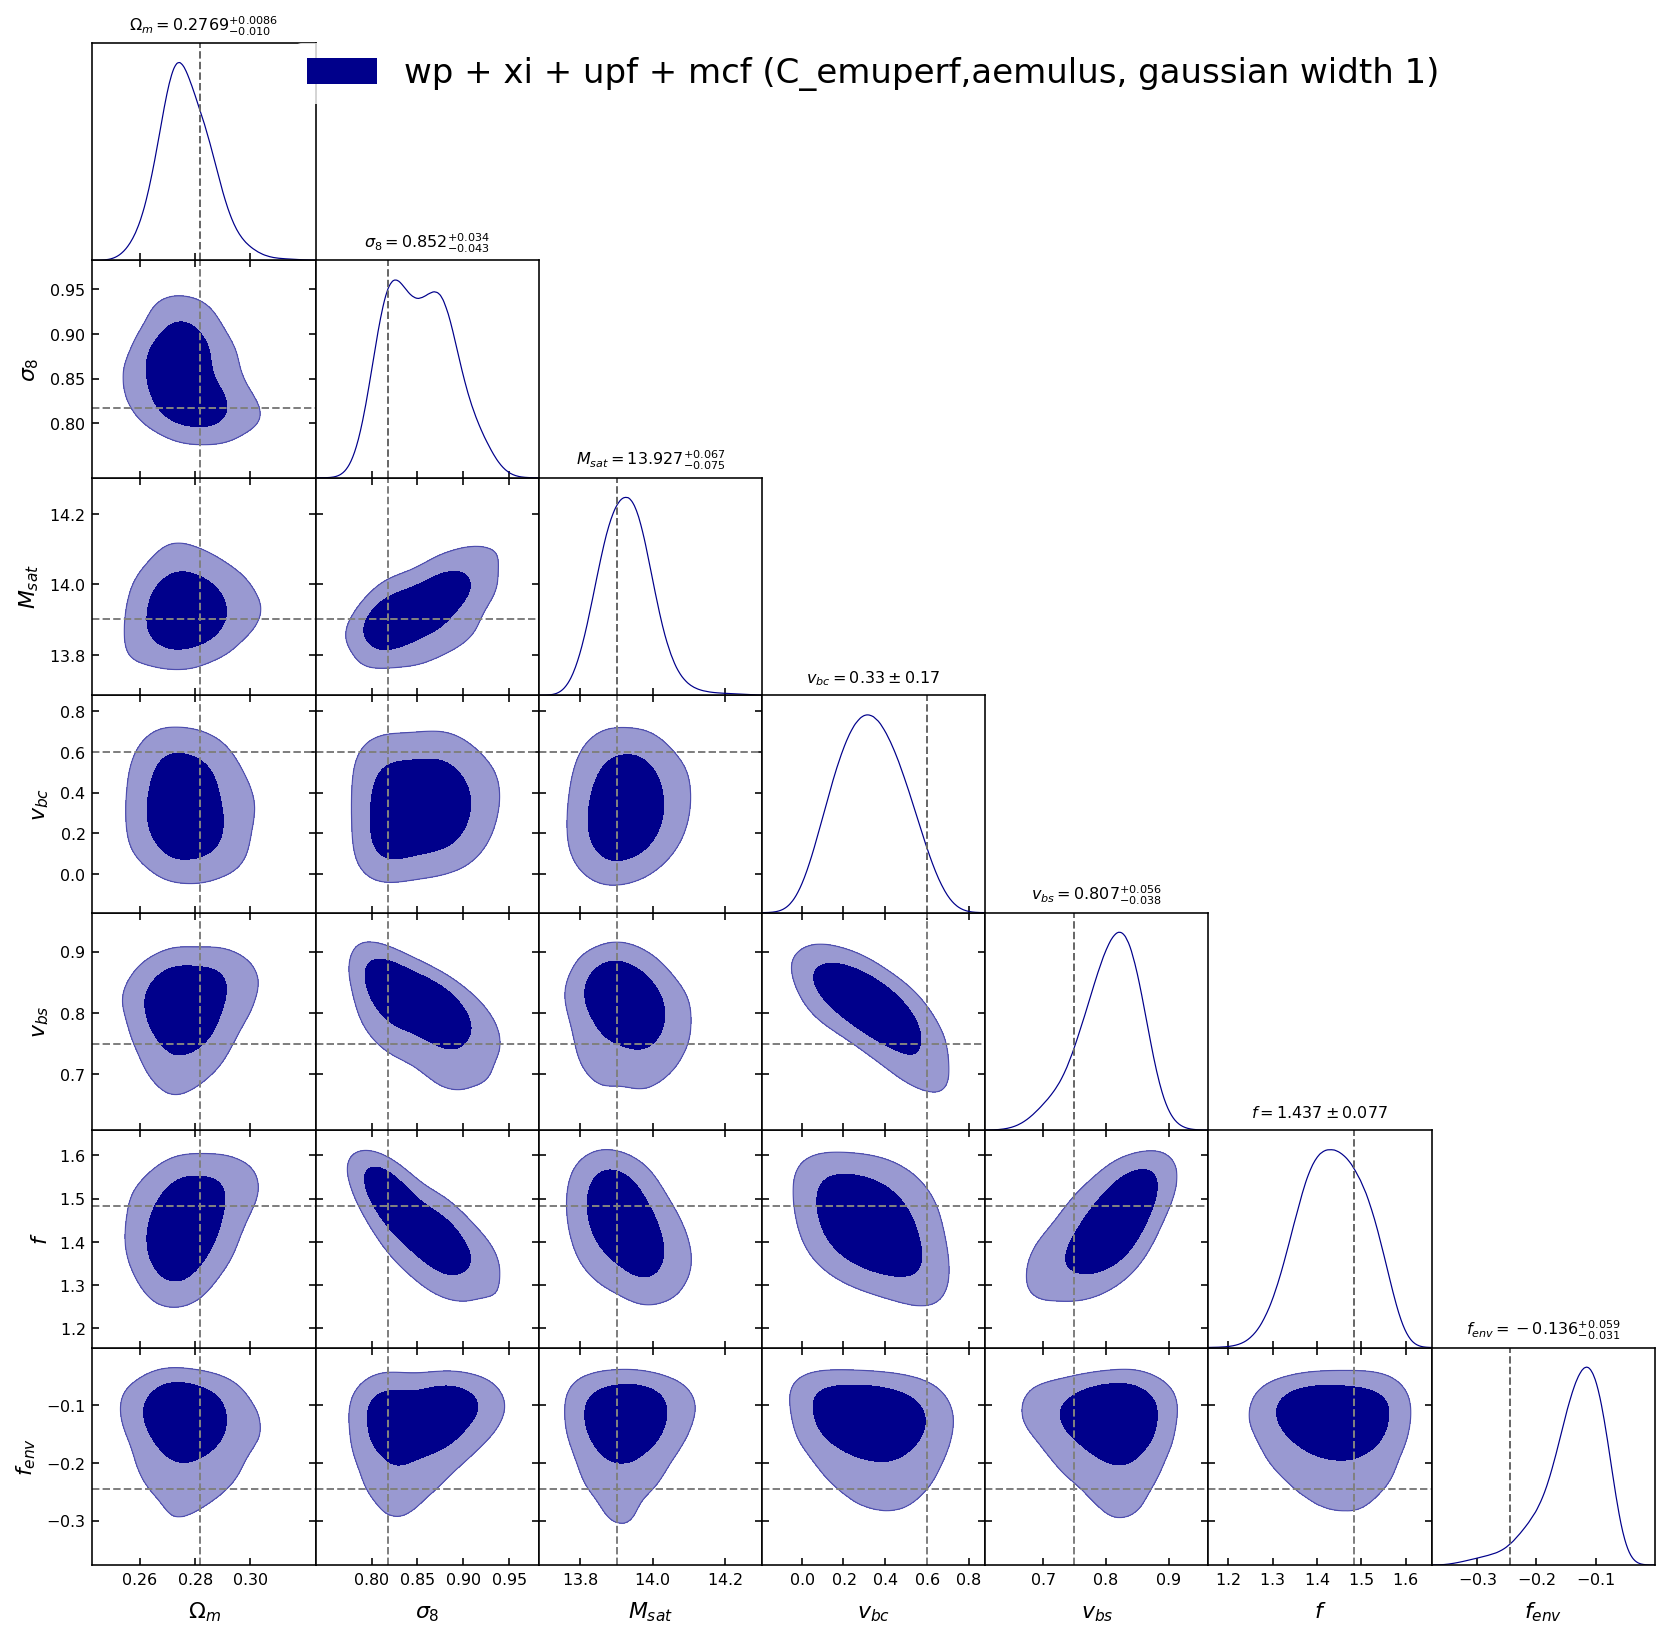

In [5]:
chaintags = [
             'wp_xi_upf_mcf_c5h50_all_dy_covsmoothgauss1',
            ]
legend_labels = [
                 'wp + xi + upf + mcf (C_emuperf,aemulus, gaussian width 1)',
                ]
colors = ['darkblue',
         ]
g = plotter.plot_contours_dynesty(chaintags, legend_labels=legend_labels,
                      colors=colors, params_toplot=key_params)

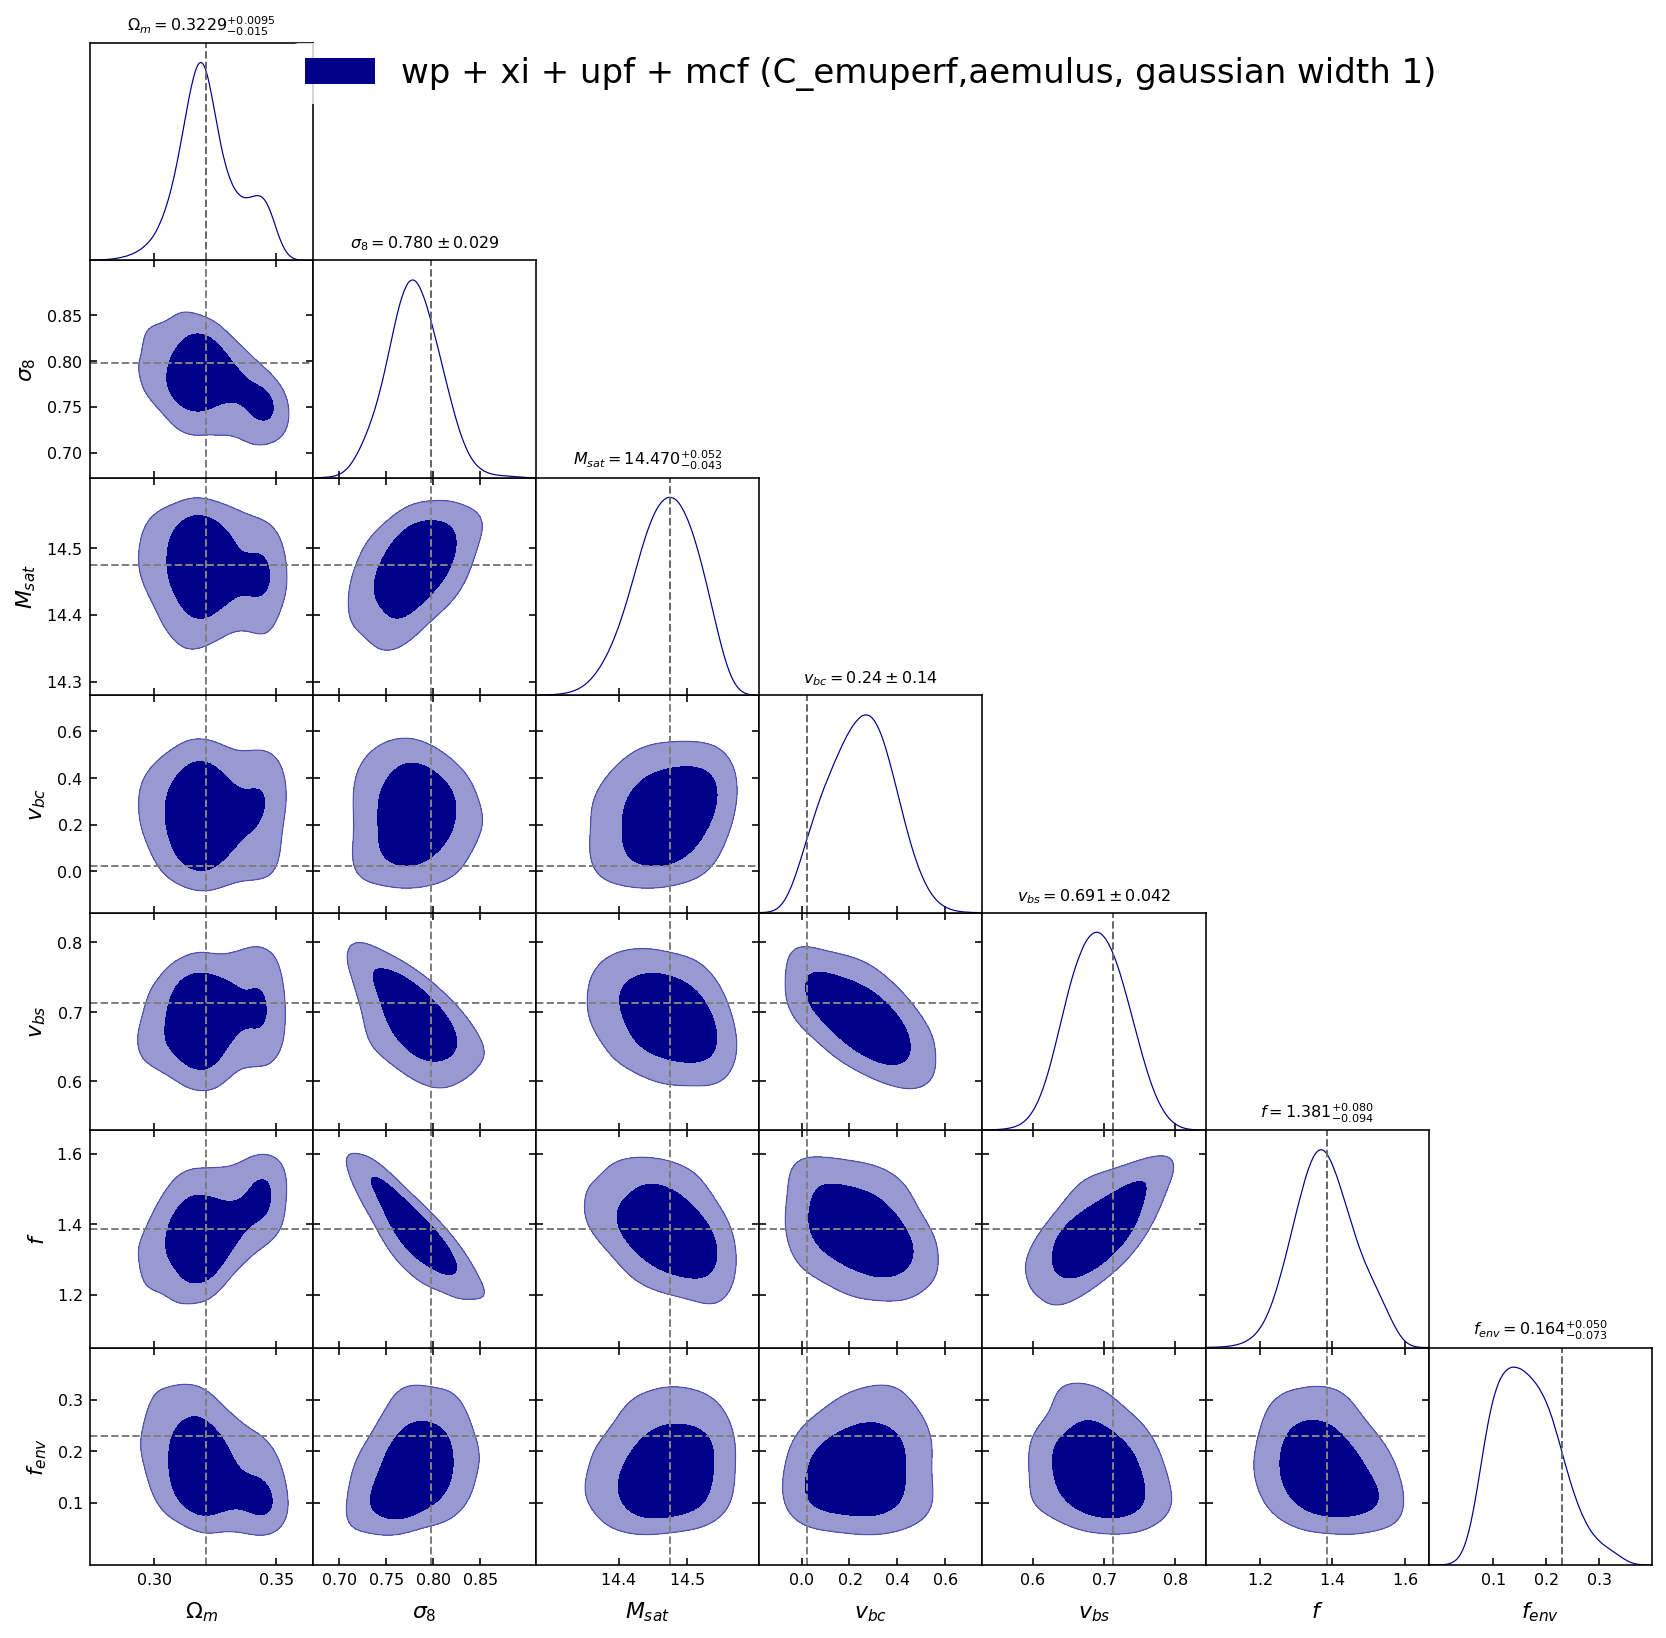

In [6]:
chaintags = [
             'wp_xi_upf_mcf_c6h60_all_dy_covsmoothgauss1',
            ]
legend_labels = [
                 'wp + xi + upf + mcf (C_emuperf,aemulus, gaussian width 1)',
                ]
colors = ['darkblue',
         ]
g = plotter.plot_contours_dynesty(chaintags, legend_labels=legend_labels,
                      colors=colors, params_toplot=key_params)

# Histograms of results

In [147]:
def get_mean_std_dict(chaintag):
    
    chain_fn = f'../chains/chains_{chaintag}.h5'
    fw = h5py.File(chain_fn, 'r')
    param_names = fw.attrs['param_names']
    
    pickle_fn = f'{pickle_dir}/results_{chaintag}.pkl'
    with open(pickle_fn, 'rb') as pf:
        res = pickle.load(pf)
        samples, weights = res.samples, np.exp(res.logwt - res.logz[-1])
        means, cov = dyfunc.mean_and_cov(samples, weights)
    
    stds = np.sqrt(np.diag(cov))
    mean_dict = dict(zip(param_names, means))
    std_dict = dict(zip(param_names, stds))
    
    return mean_dict, std_dict

In [148]:
def get_uncertainty_dict(chaintag):
    chain_fn = f'../chains/chains_{chaintag}.h5'
    fw = h5py.File(chain_fn, 'r')
    param_names = fw.attrs['param_names']
    
    pickle_fn = f'{pickle_dir}/results_{chaintag}.pkl'
    with open(pickle_fn, 'rb') as pf:
        res = pickle.load(pf)
        samples, weights = res.samples, np.exp(res.logwt - res.logz[-1])
        samples_equal = dyfunc.resample_equal(samples, weights)

    lower = np.percentile(samples_equal, 16, axis=0)
    upper = np.percentile(samples_equal, 84, axis=0)
    uncertainty_dict = dict(zip(param_names, zip(lower, upper)))
    
    return uncertainty_dict

In [149]:
def get_posterior_maxes_dict(chaintag):
    chain_fn = f'../chains/chains_{chaintag}.h5'
    fw = h5py.File(chain_fn, 'r')
    param_names = fw.attrs['param_names']
   
    pickle_fn = f'{pickle_dir}/results_{chaintag}.pkl'
    with open(pickle_fn, 'rb') as pf:
        res = pickle.load(pf)
        samples = res['samples']#[:,idx_param]
        lnweight = np.array(res['logwt'])
        lnevidence = np.array(res['logz'])
    weights = np.exp(lnweight - lnevidence[-1])
    weights = weights.flatten()
    samps = MCSamples(names=param_names)
    samps.setSamples(samples, weights=weights)
    
    max_dict = {}
    for i, pn in enumerate(param_names):
        xvals = np.linspace(min(samples[:,i]), max(samples[:,i]), 1000)
        dens = samps.get1DDensity(pn)   
        probs = dens(xvals)
        posterior_max = xvals[np.argmax(probs)]
        max_dict[pn] = posterior_max
    #ms = samps.getMargeStats()
    #print(ms)
    return max_dict

In [150]:
def get_true_param_dict(chaintag):
    chain_fn = f'../chains/chains_{chaintag}.h5'
    f = h5py.File(chain_fn, 'r')
    param_names = f.attrs['param_names']
    truths = f.attrs['true_values']
    truth_dict = dict(zip(param_names, truths))
    return truth_dict

In [151]:
def get_median_dict(chaintag):
    chain_fn = f'../chains/chains_{chaintag}.h5'
    fw = h5py.File(chain_fn, 'r')
    param_names = fw.attrs['param_names']
    
    pickle_fn = f'{pickle_dir}/results_{chaintag}.pkl'
    with open(pickle_fn, 'rb') as pf:
        res = pickle.load(pf)
        samples, weights = res.samples, np.exp(res.logwt - res.logz[-1])
        samples_equal = dyfunc.resample_equal(samples, weights)

    medians = np.median(samples_equal, axis=0)
    median_dict = dict(zip(param_names, medians))
    return median_dict

## Check maximum posteror

In [ ]:
chaintag = 'wp_xi_upf_mcf_c3h30_all_dy_covsmoothgauss1'
result_dict = get_posterior_maxes(chaintag)

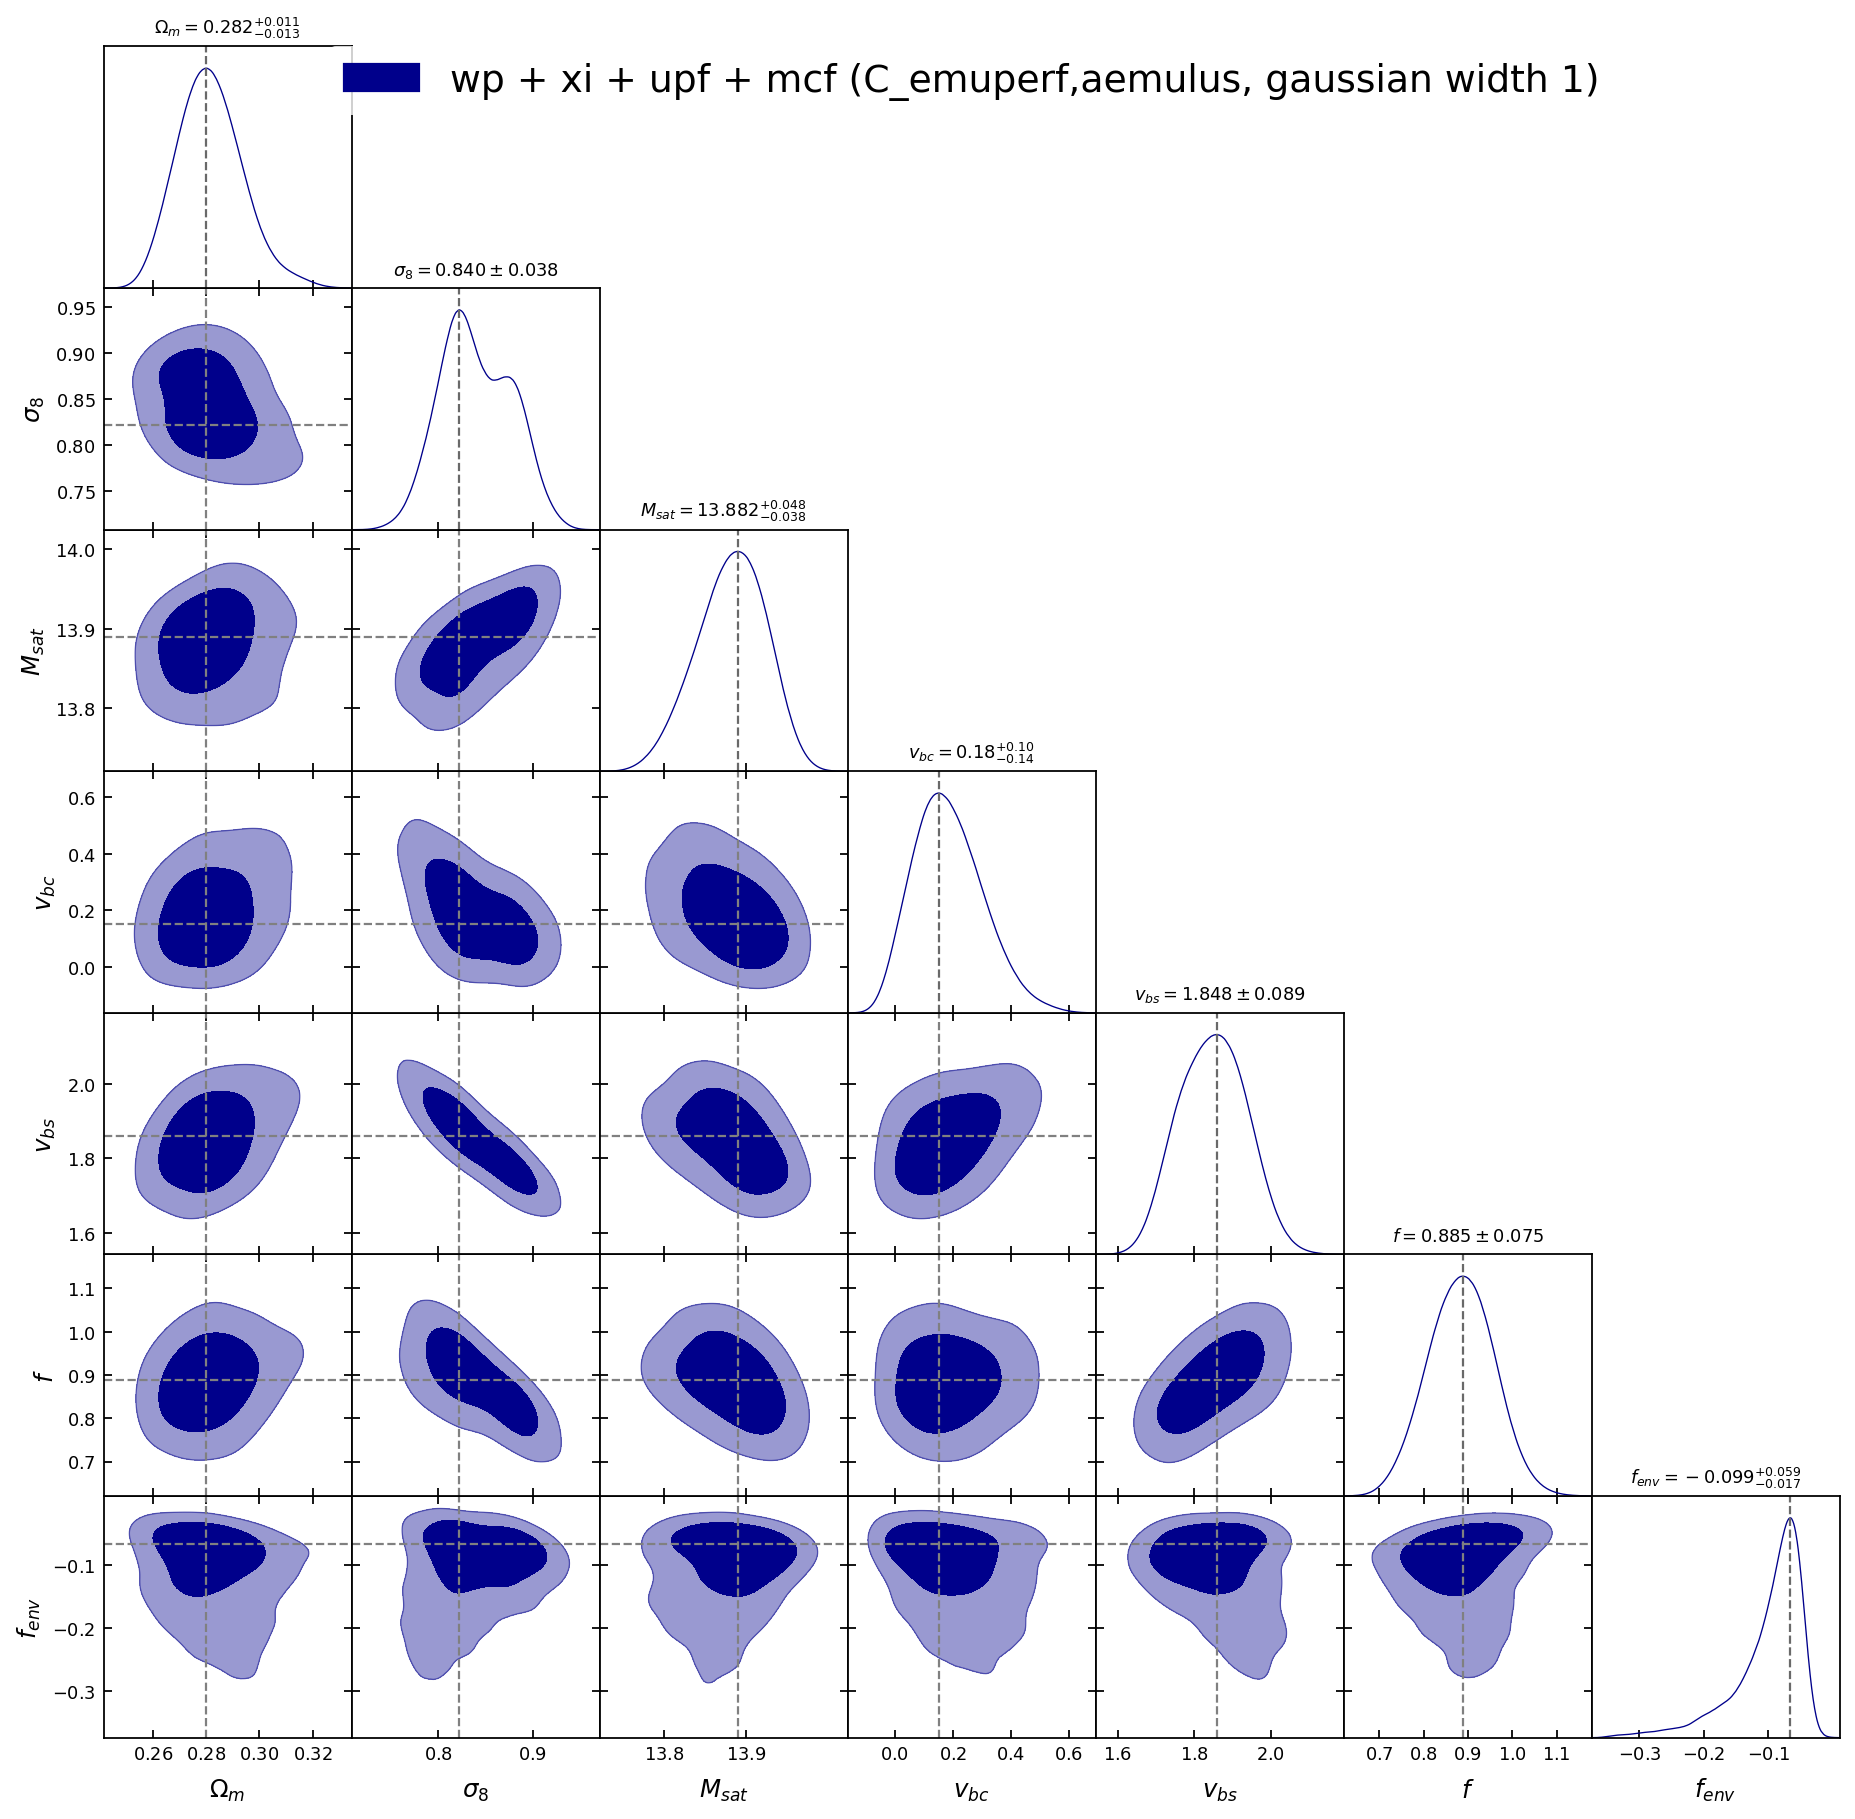

In [32]:
chaintags = [
             'wp_xi_upf_mcf_c3h30_all_dy_covsmoothgauss1',
            ]
legend_labels = [
                 'wp + xi + upf + mcf (C_emuperf,aemulus, gaussian width 1)',
                ]
colors = ['darkblue',
         ]

posts = np.array([result_dict[p] for p in all_params])
g = plotter.plot_contours_dynesty(chaintags, legend_labels=legend_labels,
                      colors=colors, params_toplot=key_params, vertical_markers=posts)

In [65]:
id_pairs = np.loadtxt('../tables/id_pairs_recovery_test.txt', delimiter=',', dtype=np.int)
#id_pairs = [(0,0), (1,10), (2,20), (3,30)]
#id_pairs += [(1,1), (2,0), (3,3), (4,4)]
# these ones aren't finished running yet!
id_pairs = np.delete(id_pairs, [17, 20], 0)
params_toplot = ['Omega_m', 'sigma_8']

result_vals = np.empty((len(id_pairs), len(params_toplot)))
for i, id_pair in enumerate(id_pairs):
    id_cosmo, id_hod = id_pair
    chaintag = f'wp_xi_upf_mcf_c{id_cosmo}h{id_hod}_all_dy_covsmoothgauss1'
    result_dict = get_posterior_maxes_dict(chaintag)
    maxes = np.array([result_dict[p] for p in params_toplot])
    truth_dict = get_true_param_dict(chaintag)
    truths = np.array([truth_dict[p] for p in params_toplot])
    result_vals[i,:] = maxes - truths    

## Build results tables

In [92]:
id_pairs = np.loadtxt('../tables/id_pairs_recovery_test.txt', delimiter=',', dtype=np.int)
# these ones aren't finished running yet!
id_pairs = np.delete(id_pairs, [17, 20], 0)
params_toplot = ['Omega_m', 'sigma_8']

In [152]:
mean_vals = np.empty((len(id_pairs), len(params_toplot)))
median_vals = np.empty((len(id_pairs), len(params_toplot)))
max_vals = np.empty((len(id_pairs), len(params_toplot)))
truth_vals = np.empty((len(id_pairs), len(params_toplot)))

lower_vals = np.empty((len(id_pairs), len(params_toplot)))
upper_vals = np.empty((len(id_pairs), len(params_toplot)))
stds = np.empty(len(id_pairs))

for i, id_pair in enumerate(id_pairs):
    id_cosmo, id_hod = id_pair
    chaintag = f'wp_xi_upf_mcf_c{id_cosmo}h{id_hod}_all_dy_covsmoothgauss1'
    
    mean_dict, std_dict = get_mean_std_dict(chaintag)
    mean_vals[i,:] = np.array([mean_dict[p] for p in params_toplot])
    median_dict = get_median_dict(chaintag)
    median_vals[i,:] = np.array([median_dict[p] for p in params_toplot])
    max_dict = get_posterior_maxes_dict(chaintag)
    max_vals[i,:] = np.array([max_dict[p] for p in params_toplot])
    
    truth_dict = get_true_param_dict(chaintag)
    truth_vals[i,:]  = np.array([truth_dict[p] for p in params_toplot])
    
    uncertainty_dict = get_uncertainty_dict(chaintag)
    lower_vals[i,:] = np.array([uncertainty_dict[p][0] for p in params_toplot])
    upper_vals[i,:] = np.array([uncertainty_dict[p][1] for p in params_toplot])

### Mean results

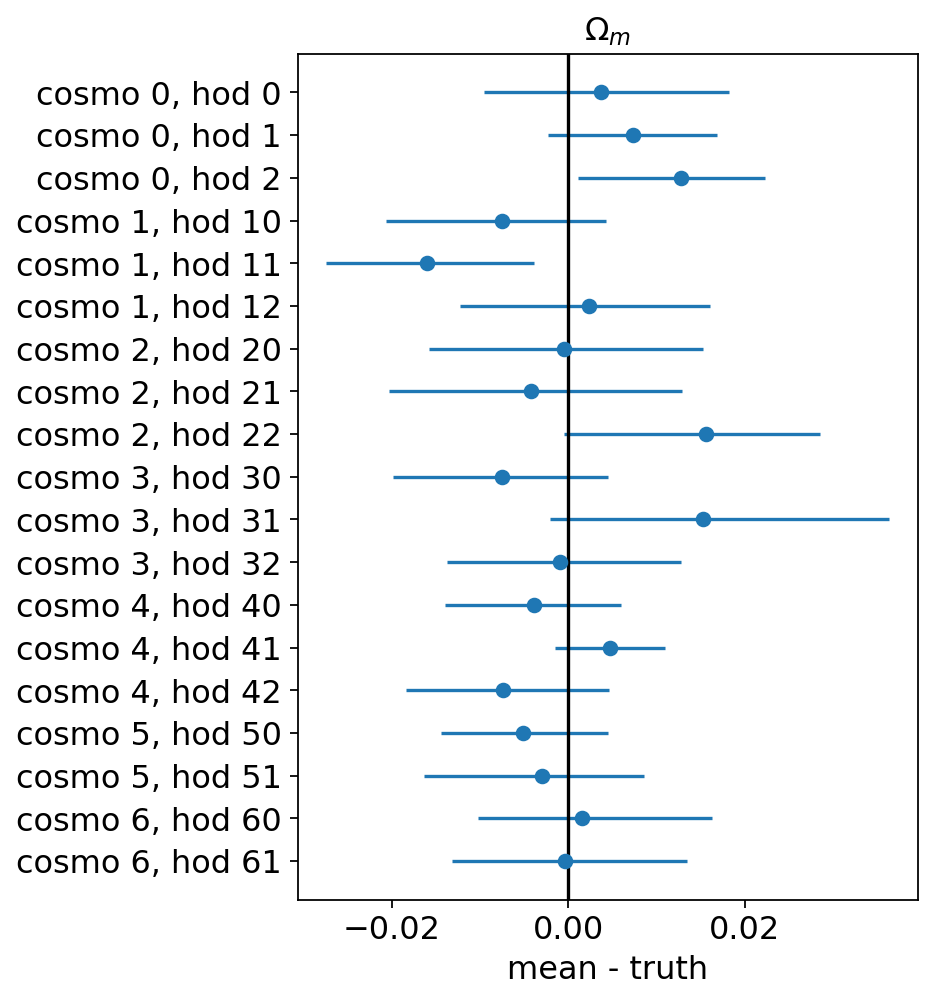

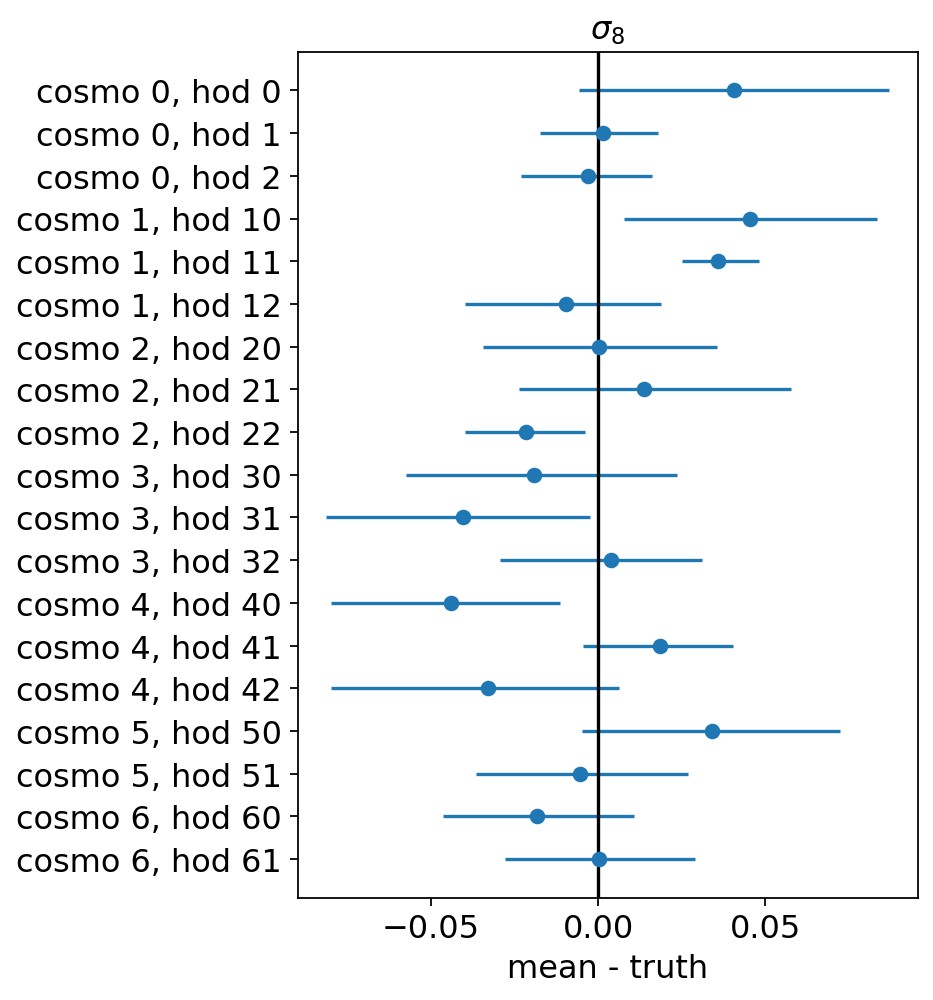

In [94]:
labels = [f'cosmo {ip[0]}, hod {ip[1]}' for ip in id_pairs]
yvals = range(len(id_pairs))
for j, p in enumerate(params_toplot):    
    
    plt.figure(figsize=(5,7))

    lower = mean_vals[:,j] - lower_vals[:,j].T 
    upper = upper_vals[:,j].T - mean_vals[:,j]
    plt.errorbar(mean_vals[:,j]-truth_vals[:,j], yvals, xerr=[lower,upper], marker='o', ls='None')

    plt.yticks(ticks=yvals, labels=labels)
    
    plt.axvline(0.0, color='k')
    plt.gca().invert_yaxis()
    plt.title(fr'${param_labels[p]}$')
    plt.xlabel("mean - truth")

### Median results

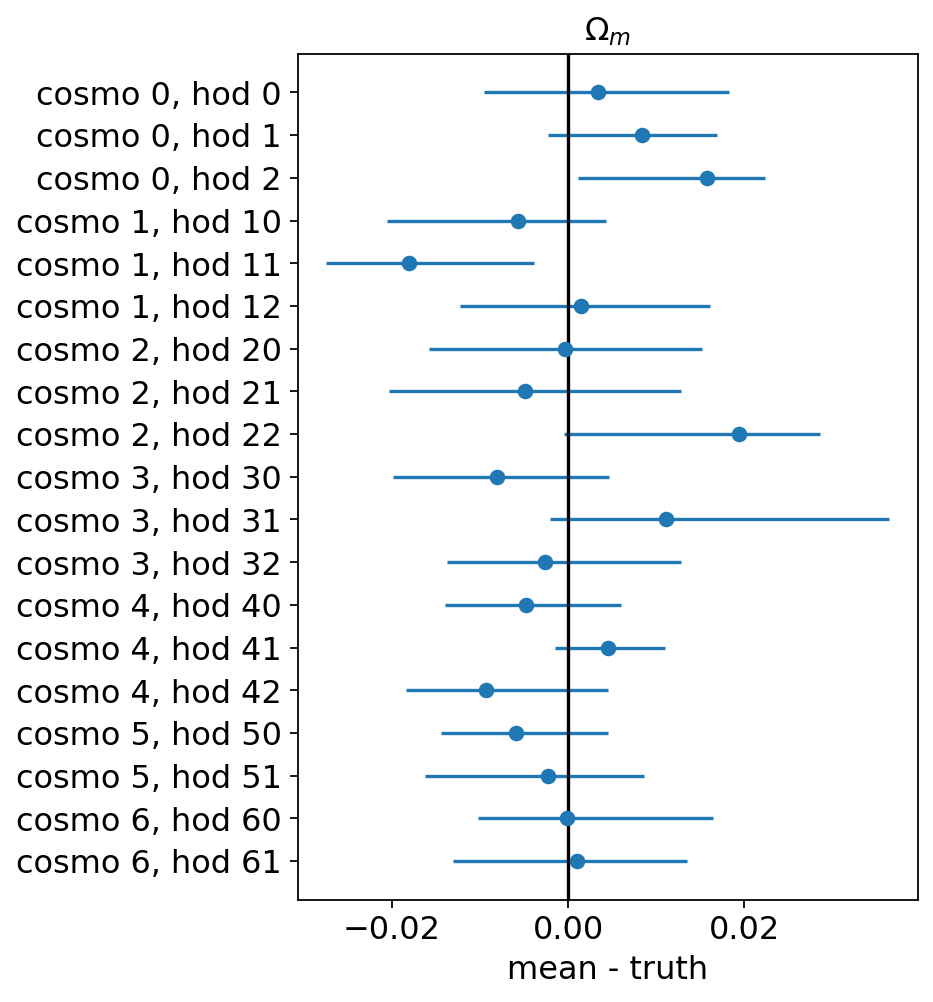

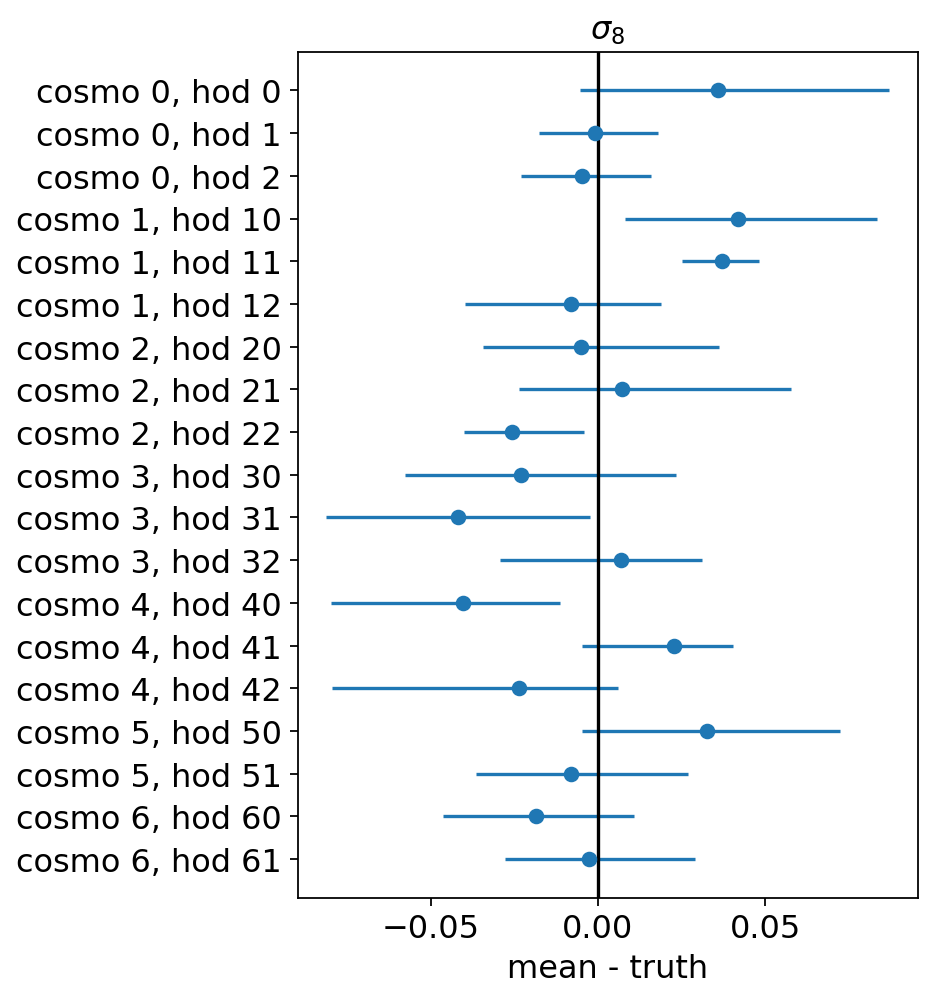

In [153]:
labels = [f'cosmo {ip[0]}, hod {ip[1]}' for ip in id_pairs]
yvals = range(len(id_pairs))
for j, p in enumerate(params_toplot):    
    
    plt.figure(figsize=(5,7))

    lower = median_vals[:,j] - lower_vals[:,j].T 
    upper = upper_vals[:,j].T - median_vals[:,j]
    plt.errorbar(median_vals[:,j]-truth_vals[:,j], yvals, xerr=[lower,upper], marker='o', ls='None')

    plt.yticks(ticks=yvals, labels=labels)
    
    plt.axvline(0.0, color='k')
    plt.gca().invert_yaxis()
    plt.title(fr'${param_labels[p]}$')
    plt.xlabel("mean - truth")

### Maximum of posterior results

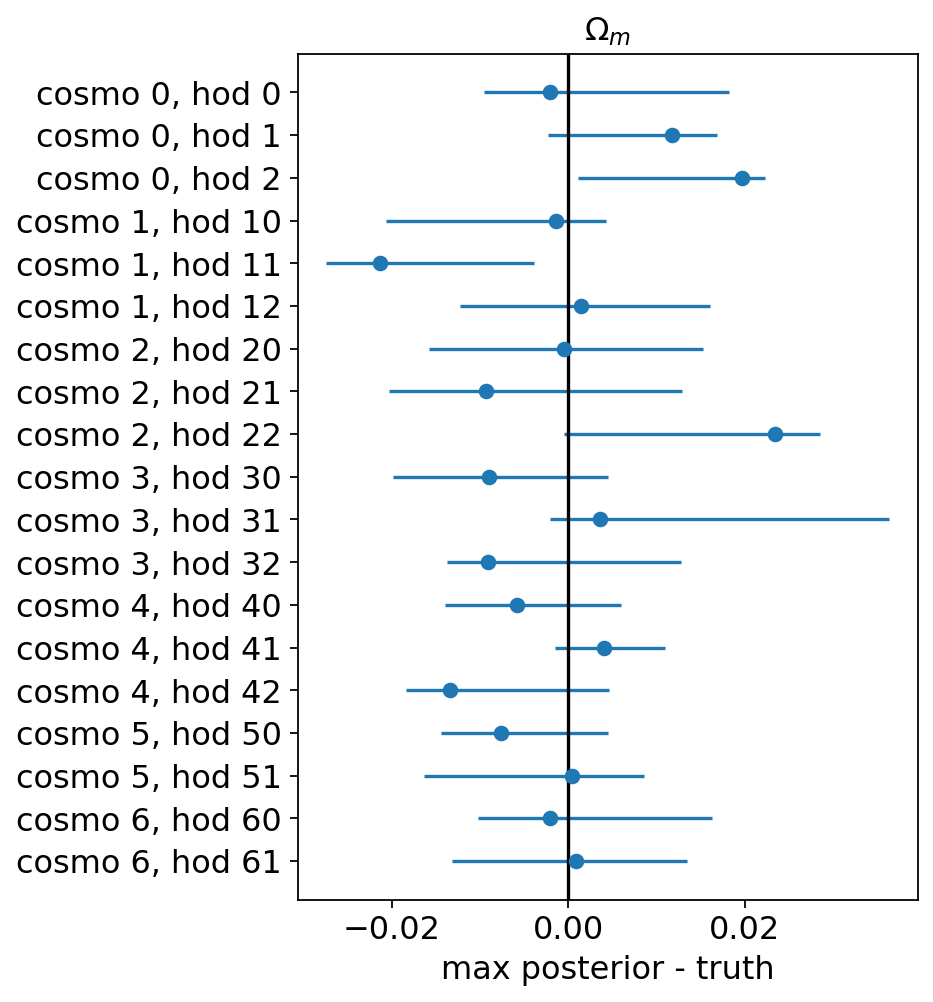

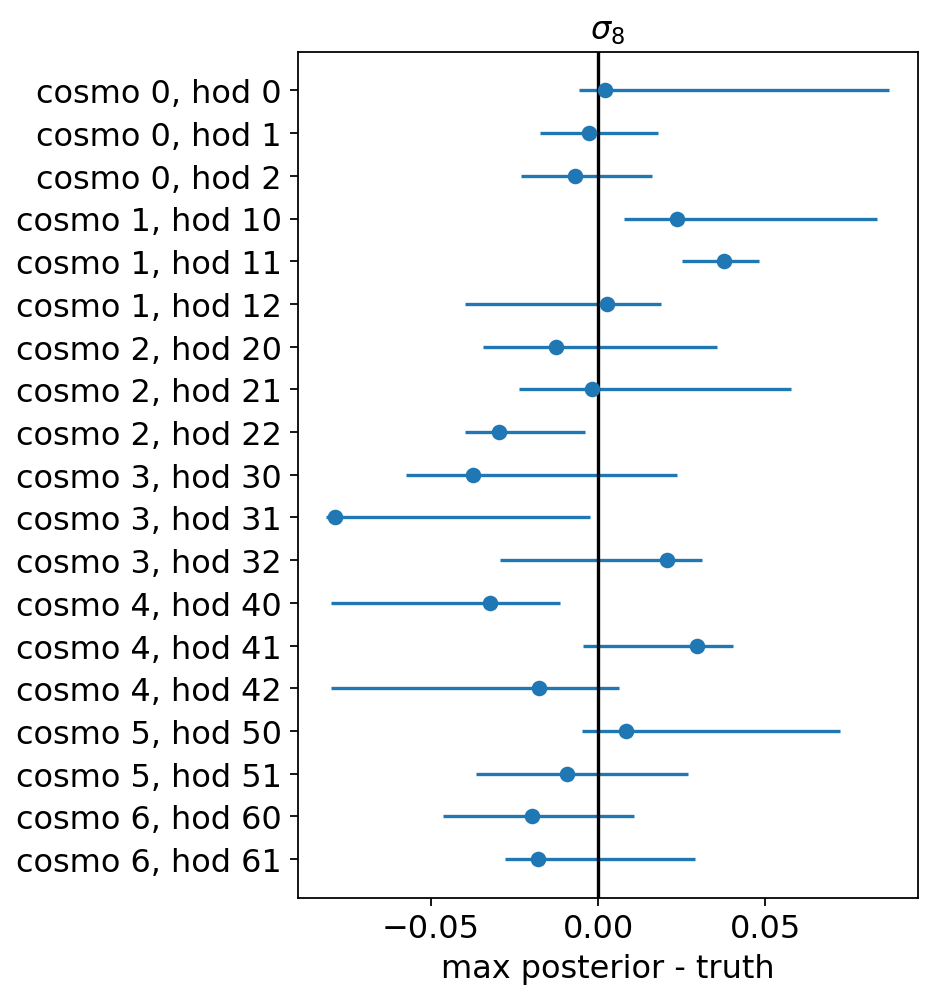

In [95]:
labels = [f'cosmo {ip[0]}, hod {ip[1]}' for ip in id_pairs]
yvals = range(len(id_pairs))
for j, p in enumerate(params_toplot):    
    
    plt.figure(figsize=(5,7))

    lower = max_vals[:,j] - lower_vals[:,j].T 
    upper = upper_vals[:,j].T - max_vals[:,j]
    plt.errorbar(max_vals[:,j]-truth_vals[:,j], yvals, xerr=[lower,upper], marker='o', ls='None')

    plt.yticks(ticks=yvals, labels=labels)
    
    plt.axvline(0.0, color='k')
    plt.gca().invert_yaxis()
    plt.title(fr'${param_labels[p]}$')
    plt.xlabel("max posterior - truth")

## Check fits

In [108]:
def get_fits(chaintag, param_arr):
    
    chain_fn = f'../chains/chains_{chaintag}.h5'
    f = h5py.File(chain_fn, 'r')
    
    param_names = f.attrs['param_names']
    statistics = f.attrs['statistic']
    cosmo = f.attrs['cosmo']
    hod = f.attrs['hod']
    
    emus, fixed_params, gperrs = build_emus(f)
    
    vals_arr_all = []
    vals_true_all = []

    for i, statistic in enumerate(statistics):
        vals_arr = []
        for params in param_arr:
            vals_arr.append(get_emu_predictions(emus[i], params, param_names, fixed_params))
        
        vals_arr_all.append(vals_arr)
        vals_true_all.append(emus[i].testing_data[(cosmo, hod)])

    return statistics, np.array(vals_arr_all), np.array(vals_true_all), gperrs

In [98]:
def load_res(chaintag):
    pickle_fn = f'{pickle_dir}/results_{chaintag}.pkl'
    with open(pickle_fn, 'rb') as pf:
        res = pickle.load(pf)
    return res

In [99]:
def get_true_params(chaintag):
    chain_fn = f'../chains/chains_{chaintag}.h5'
    f = h5py.File(chain_fn, 'r')
    truths = f.attrs['true_values']
    return truths

In [100]:
def get_emu_predictions(emu, params_topredict, param_names, fixed_params):
    param_dict_pred = dict(zip(param_names, params_topredict))
    param_dict_pred.update(fixed_params)
    emu_preds = emu.predict(param_dict_pred)
    return emu_preds

In [103]:
def get_mean_params(res):
    samples, weights = res.samples, np.exp(res.logwt - res.logz[-1])
    mean, cov = dyfunc.mean_and_cov(samples, weights)
    return mean

In [121]:
def get_posterior_max_arr(chaintag):
    chain_fn = f'../chains/chains_{chaintag}.h5'
    fw = h5py.File(chain_fn, 'r')
    param_names = fw.attrs['param_names']
   
    pickle_fn = f'{pickle_dir}/results_{chaintag}.pkl'
    with open(pickle_fn, 'rb') as pf:
        res = pickle.load(pf)
        samples = res['samples']#[:,idx_param]
        lnweight = np.array(res['logwt'])
        lnevidence = np.array(res['logz'])
    weights = np.exp(lnweight - lnevidence[-1])
    weights = weights.flatten()
    samps = MCSamples(names=param_names)
    samps.setSamples(samples, weights=weights)
    
    max_arr = []
    for i, pn in enumerate(param_names):
        xvals = np.linspace(min(samples[:,i]), max(samples[:,i]), 1000)
        dens = samps.get1DDensity(pn)   
        probs = dens(xvals)
        posterior_max = xvals[np.argmax(probs)]
        max_arr.append(posterior_max)
    #ms = samps.getMargeStats()
    #print(ms)
    return max_arr

In [138]:
def get_median_params(chaintag):
    chain_fn = f'../chains/chains_{chaintag}.h5'
    fw = h5py.File(chain_fn, 'r')
    param_names = fw.attrs['param_names']
    
    pickle_fn = f'{pickle_dir}/results_{chaintag}.pkl'
    with open(pickle_fn, 'rb') as pf:
        res = pickle.load(pf)
        samples, weights = res.samples, np.exp(res.logwt - res.logz[-1])
        samples_equal = dyfunc.resample_equal(samples, weights)

    medians = np.median(samples_equal, axis=0)

    return medians

In [114]:
def build_emus(f):
    
    #chain_fn = f'../chains/chains_{chaintag}.h5'
    #f = h5py.File(chain_fn, 'r')
    
    ### data params
    cosmo = f.attrs['cosmo']
    hod = f.attrs['hod']
    
    ### emu params
    statistics = f.attrs['statistic']
    traintags = f.attrs['traintag']
    testtags = f.attrs['testtag']
    errtags = f.attrs['errtag']
    tags = f.attrs['tag']
    kernel_names = f.attrs['kernel_name']
    logs = f.attrs['log']
    means = f.attrs['mean']
    nhods = f.attrs['nhod']

    ### chain params
    param_names = f.attrs['param_names']
    
    # Set file and directory names
    nstats = len(statistics)
    training_dirs = [None]*nstats
    testing_dirs = [None]*nstats
    hyperparams = [None]*nstats
    acctags = [None]*nstats
    gperrs = [None]*nstats
    ys = []
    cov_dir = '../../clust/covariances/'
    for i, statistic in enumerate(statistics):
        gptag = traintags[i] + errtags[i] + tags[i]
        acctags[i] = gptag + testtags[i]
        gperrs[i] = np.loadtxt(cov_dir+"error_aemulus_{}{}.dat".format(statistic, errtags[i]))
        training_dirs[i] = f'../../clust/results_aemulus_train/results_{statistic}/'
        testing_dirs[i] = f'../../clust/results_aemulus_test_mean/results_{statistic}/'
        hyperparams[i] = "../training_results/{}_training_results{}.dat".format(statistic, gptag)
    
    # number of parameters, out of 11 hod + 7 cosmo
    num_params = len(param_names)
    cosmo_names = ['Omega_m', 'Omega_b', 'sigma_8', 'h', 'n_s', 'N_eff', 'w']
    cosmos_truth = np.loadtxt('../tables/cosmology_camb_test_box_full.dat')

    hod_names = ['M_sat', 'alpha', 'M_cut', 'sigma_logM', 'v_bc', 'v_bs', 'c_vir', 'f', 'f_env', 'delta_env', 'sigma_env']
    hods_truth = np.loadtxt('../tables/HOD_test_np11_n1000_new_f_env.dat')
    hods_truth[:, 0] = np.log10(hods_truth[:, 0])
    hods_truth[:, 2] = np.log10(hods_truth[:, 2])

    fixed_params = {}
    cosmo_truth = cosmos_truth[cosmo]
    hod_truth = hods_truth[hod]
    for (cn, ct) in zip(cosmo_names, cosmo_truth):
        fixed_params[cn] = ct
    for (hn, ht) in zip(hod_names, hod_truth):
        fixed_params[hn] = ht

    # remove params that we want to vary from fixed param dict and add true values
    truths = f.attrs['true_values']
    for pn in param_names:
        fixed_params.pop(pn)
        
    print("Building emulators")
    emus = [None]*nstats
    for i, statistic in enumerate(statistics):
        print(f"Rebuilding emulator for {statistic}")
        emu = emulator.Emulator(statistic, training_dirs[i], testing_dir=testing_dirs[i], fixed_params=fixed_params, 
                                gperr=gperrs[i], hyperparams=hyperparams[i], log=logs[i], 
                                mean=means[i], nhod=nhods[i], kernel_name=kernel_names[i])
        emu.build()
        emus[i] = emu
        
        
    #return emus, statistics, param_names, fixed_params, truths, cosmo, hod
    return emus, fixed_params, gperrs

In [157]:
def plot_fits(statistics, vals_arr_all, vals_true_all, gperrs, fit_labels, fit_colors, title=''):
    lss = ['-', '--', '-.', ':']
    vals_arr_all = np.array(vals_arr_all)
    vals_true_all = np.array(vals_true_all)
    
    for i, statistic in enumerate(statistics):
        fig, axarr = plt.subplots(2, 1, figsize=(7,6), sharex=True, gridspec_kw={'height_ratios': [2, 1]})
        plt.subplots_adjust(hspace=0, wspace=0)
        ax0, ax1 = axarr
        
        
        ax0.plot(r_dict[statistic], vals_true_all[i], label='Truth', marker='o', ls='None', color='black')
        #ax0.errorbar(r_dict[statistic], vals_true_all[i], yerr=10*gperrs[i]*vals_true_all[i], #fmt='o')
        #             label='Truth', ls='None', color='black')
        
        for j in range(vals_arr_all.shape[1]):
            ax0.plot(r_dict[statistic], vals_arr_all[i][j], label=fit_labels[j], ls=lss[j], color=fit_colors[j])
            frac = (vals_arr_all[i][j] - vals_true_all[i])/vals_true_all[i]
            #frac = (vals_arr_all[i][j] - vals_true_all[i])/(gperrs[i]*vals_true_all[i])
            ax1.plot(r_dict[statistic], frac, label=fit_labels[j], ls=lss[j], color=fit_colors[j])
            
        # dummy to get this into legend
        ax0.plot(0, 0, ls='-', marker='None', label='Aemulus 1-box sample variance', color='plum')
        ax1.plot(r_dict[statistic], gperrs[i], label='Aemulus 1-box sample variance', ls='-', color='plum')
        
            
        ax0.set_xscale(scale_dict[statistic][0])
        ax0.set_yscale(scale_dict[statistic][1])
        ax0.set_ylabel(statistic)
        ax0.legend(fontsize=10, loc='best')
        
        ax1.axhline(0, color='darkgrey')
        ax1.set_xscale(scale_dict[statistic][0])
        ax1.set_xlabel(r"$r$")
        ax1.set_ylabel("fractional error")

In [164]:
chaintag = 'wp_xi_upf_mcf_c3h30_all_dy_covsmoothgauss1'
res = load_res(chaintag)
true_params = get_true_params(chaintag)
mean_params = get_mean_params(res)
median_params = get_median(chaintag)
max_params = get_posterior_max_arr(chaintag)

In [165]:
param_arr = [true_params, mean_params, median_params, max_params]
statistics, vals_arr_all, vals_true_all, gperrs = get_fits(chaintag, param_arr)

Building emulators
Rebuilding emulator for wp
Rebuilding emulator for xi
Rebuilding emulator for upf
Rebuilding emulator for mcf


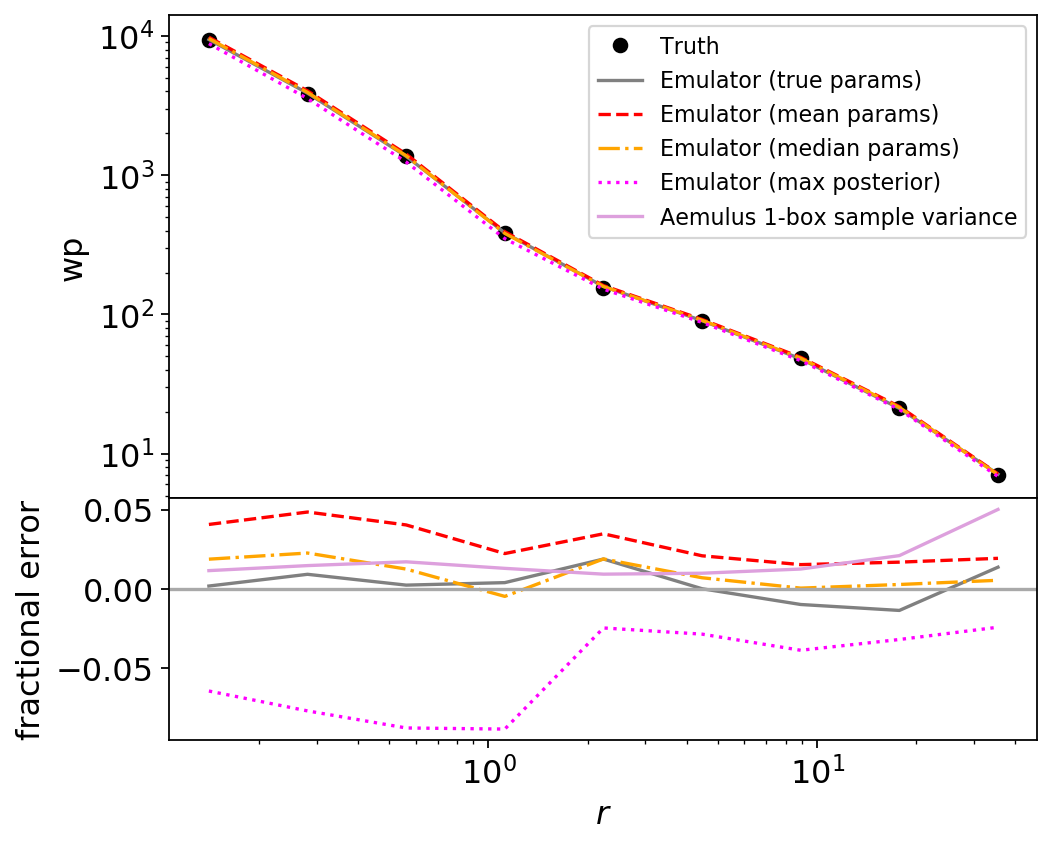

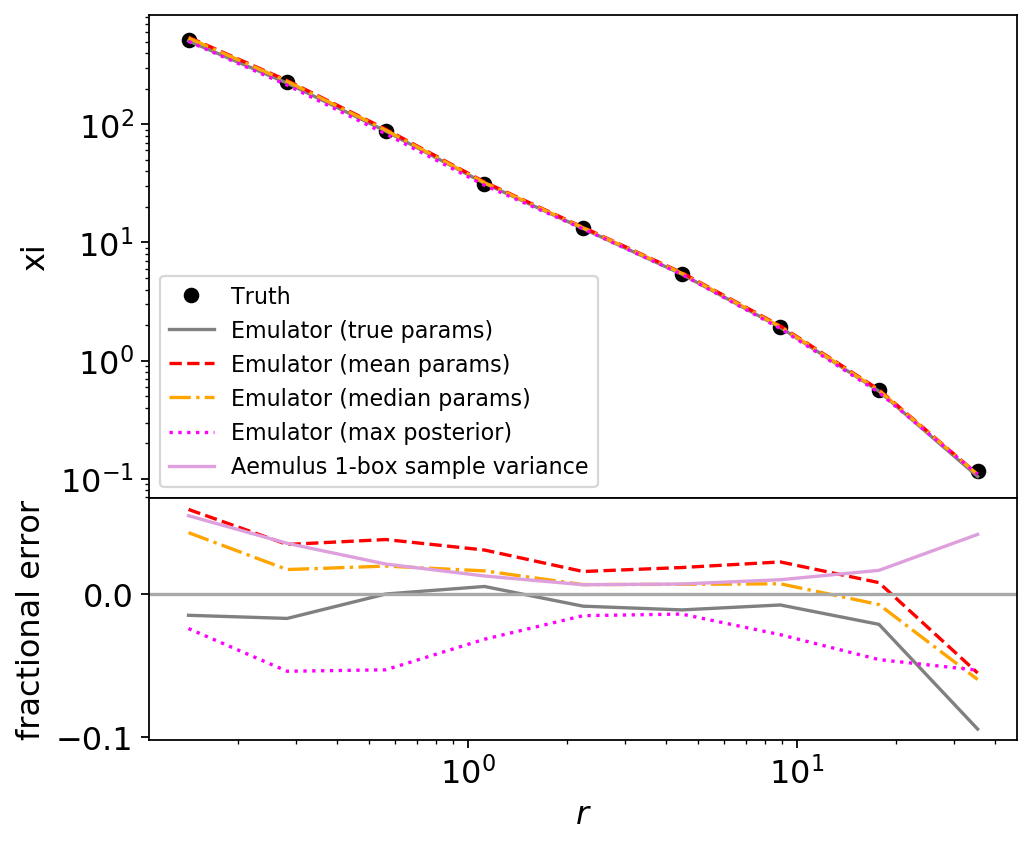

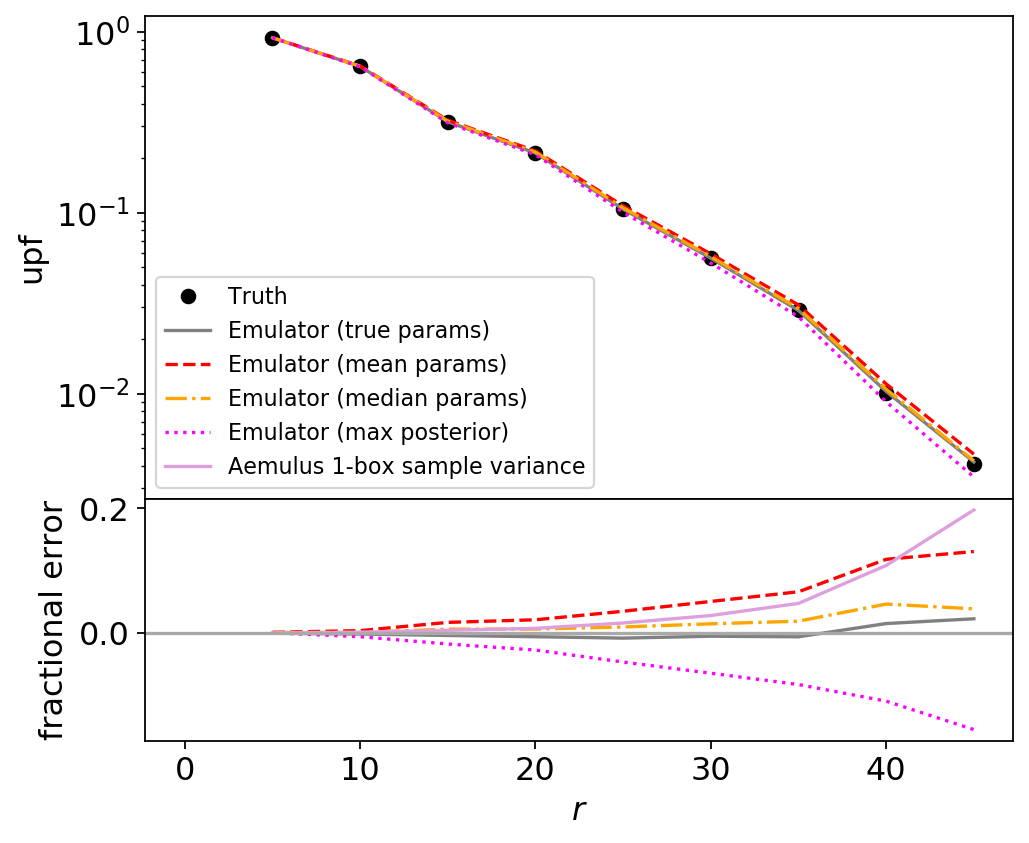

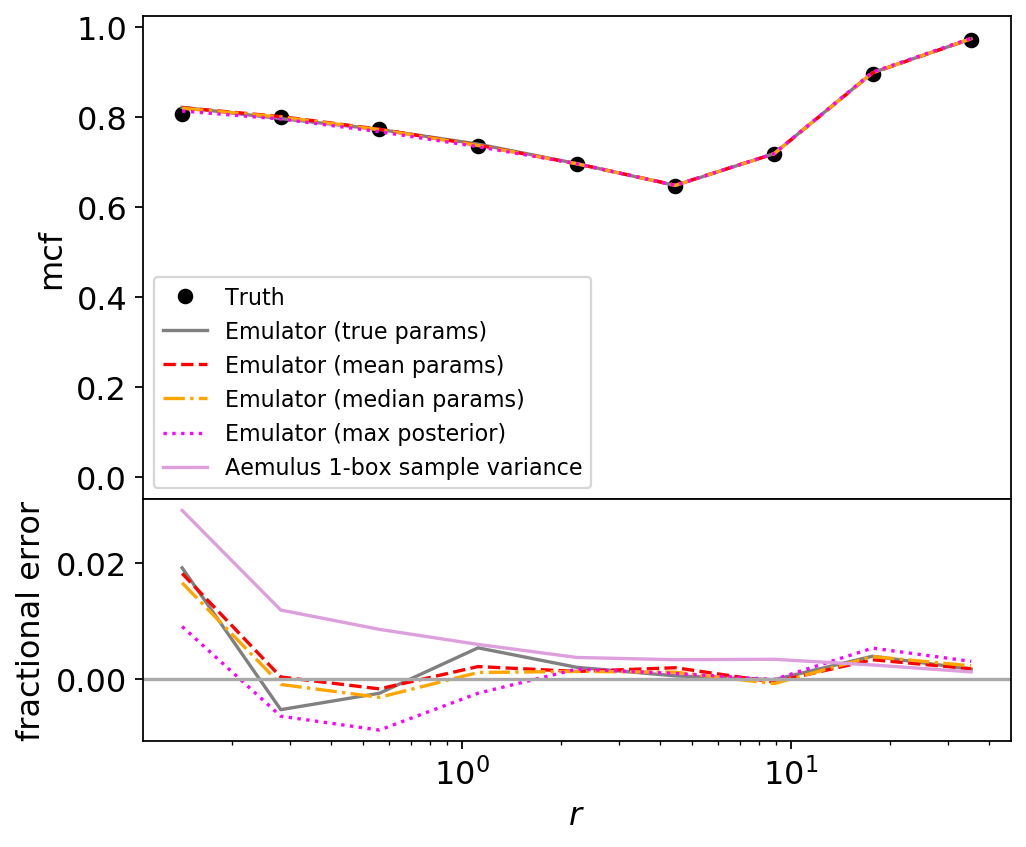

In [166]:
fit_labels = ['Emulator (true params)', 'Emulator (mean params)', 
              'Emulator (median params)', 'Emulator (max posterior)']
fit_colors = ['grey', 'red', 'orange', 'magenta']
plot_fits(statistics, vals_arr_all, vals_true_all, gperrs, fit_labels, fit_colors, title=chaintag)

In [161]:
chaintag = 'wp_xi_upf_mcf_c6h60_all_dy_covsmoothgauss1'
res = load_res(chaintag)
true_params = get_true_params(chaintag)
mean_params = get_mean_params(res)
median_params = get_median_params(chaintag)
max_params = get_posterior_max_arr(chaintag)

In [162]:
param_arr = [true_params, mean_params, median_params, max_params]
statistics, vals_arr_all, vals_true_all, gperrs = get_fits(chaintag, param_arr)

Building emulators
Rebuilding emulator for wp
Rebuilding emulator for xi
Rebuilding emulator for upf
Rebuilding emulator for mcf


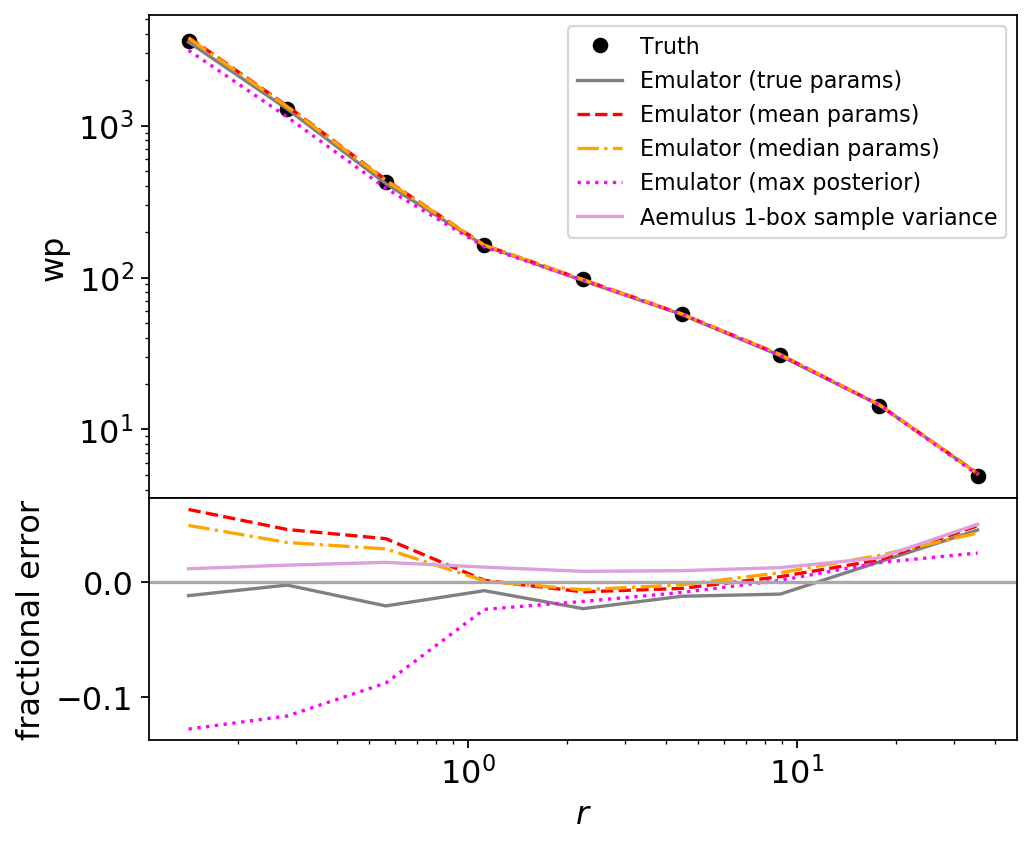

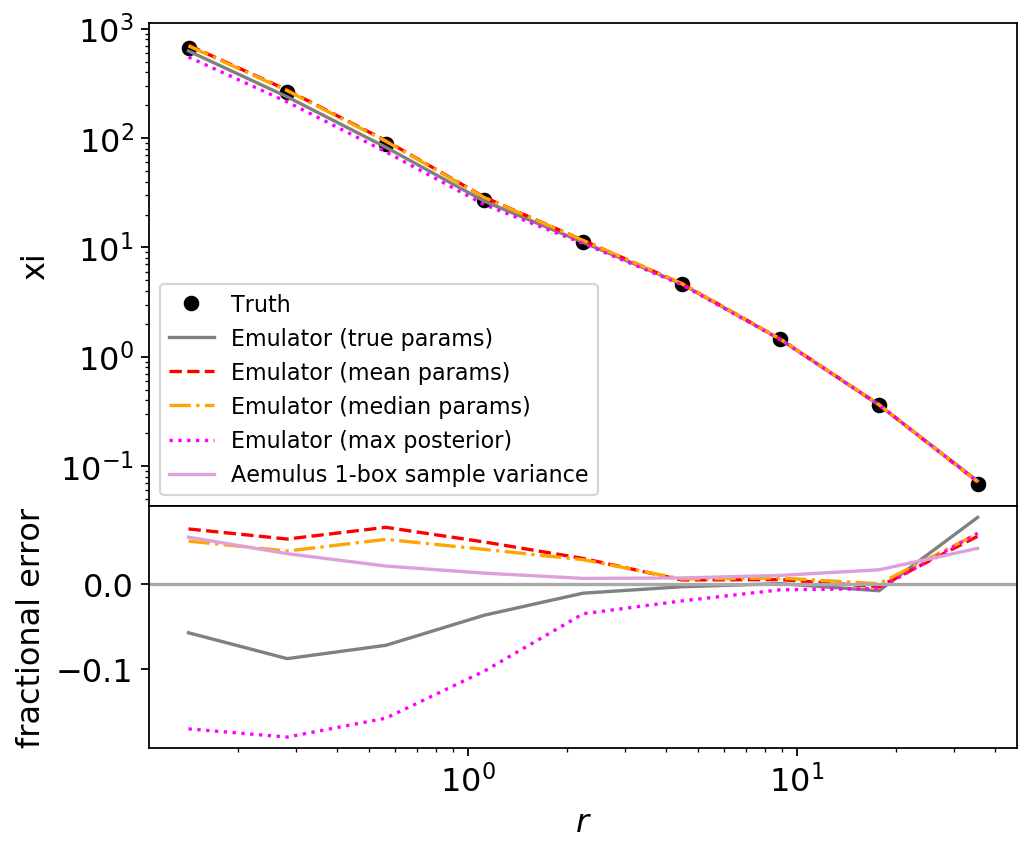

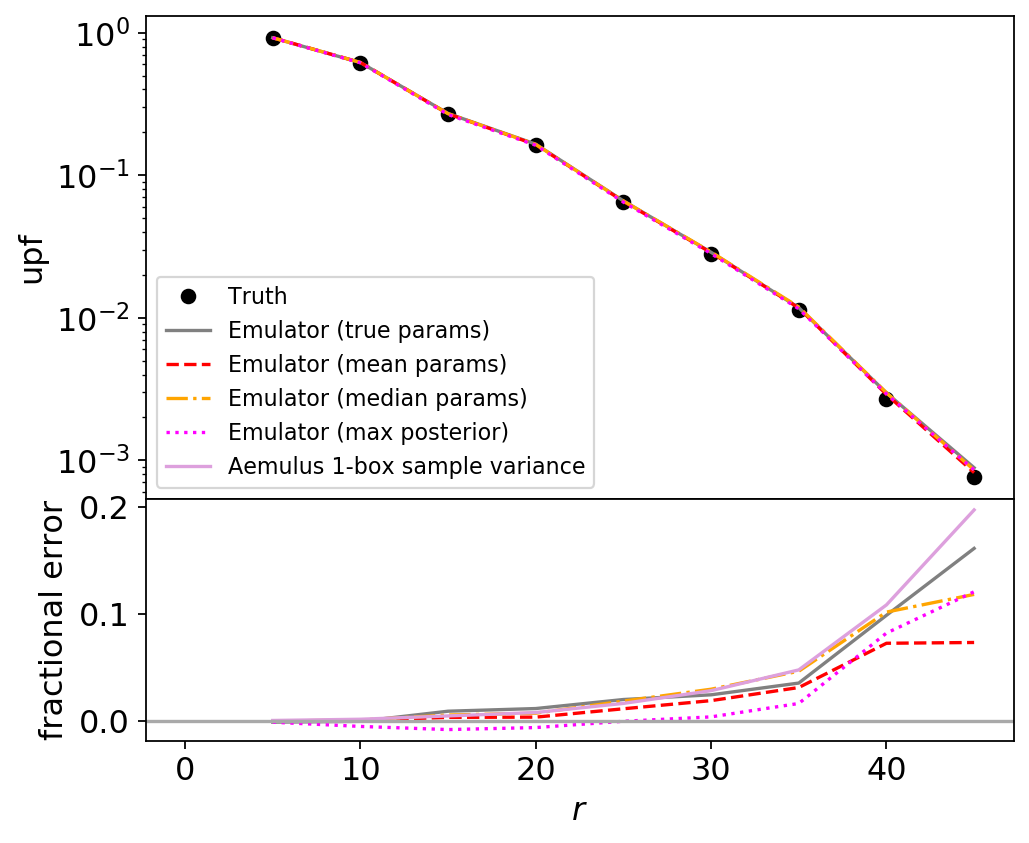

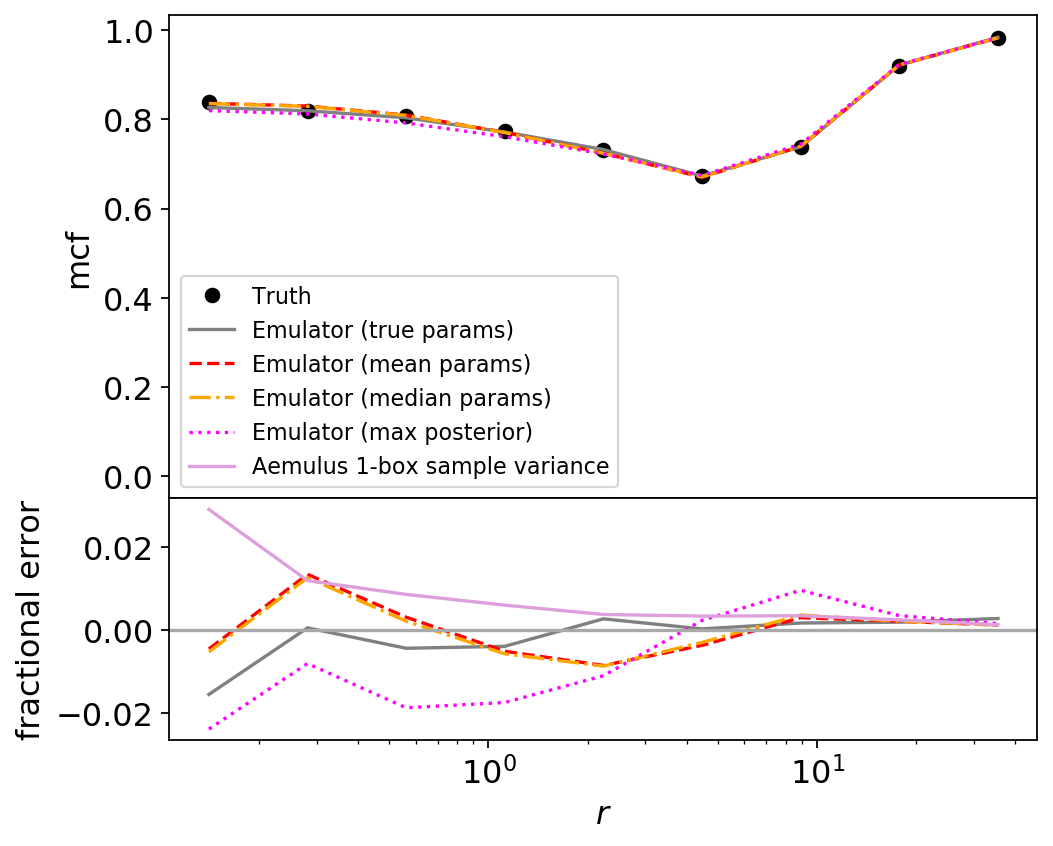

In [163]:
fit_labels = ['Emulator (true params)', 'Emulator (mean params)', 
              'Emulator (median params)', 'Emulator (max posterior)']
fit_colors = ['grey', 'red', 'orange', 'magenta']
plot_fits(statistics, vals_arr_all, vals_true_all, gperrs, fit_labels, fit_colors, title=chaintag)